<a href="https://colab.research.google.com/github/Ramprashanth17/info6105-Data-Science/blob/main/AutoML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOML H2O ASSIGNMENT**

**Abstract**

Prediction of levels of obesity by using machine learning classification models and H2O autoML

Data collected from UCI Machine Learning Repository.

**About the Dataset**

Dietary, exercise and personal daily habits of individuals from Mexico, Peru and Columbia are recorded to build estimation of obesity levels.

Obesity Level will be used as the target (y) variable, which consists of 7 classes - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

There are 17 attributes in total related to individual habits that are likely to determine obesity levels, such as number of main meals, time using technology devices, gender and transportation used.

Details of the questions and possible answers collected for the data can be found in the link provided above.

Original dataset

Gender - Female/Male

age - Numeric value

height - Numeric value in meters

weight - Numeric value in kilograms

Has a family member suffered or suffers from overweight - Yes/No

Do you eat high caloric food frequently - Yes/No

Do you usually eat vegetables in your meals - Never/Sometimes/Always

How many main meals do you have daily - Between 1 y 2/Three/More than three

Do you eat any food between meals? No/Sometimes/Frequently/Always

Do you smoke? Yes/No

How much water do you drink daily? Less than a liter/Between 1 and 2 L/More than 2 L

Do you monitor the calories you eat daily - Yes/No

How often do you have physical activity? I do not have/1 or 2 days/2 or 4 days/4 or 5 days

How much time do you use technological devices such as cell phone, videogames, television, computer and others -
0–2 hours/3–5 hours/More than 5 hours

how often do you drink alcohol? - I do not drink/Sometimes/Frequently/Always

Which transportation do you usually use? Automobile/Motorbike/Bike/Public Transportation/Walking

**Exploratory Data Analysis**

The goal is to see the data,remove any duplicates or null values found and see the distribution of the data.

In [4]:
# Importing necessary libraries for the process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# storing the data to a dataframe for analysis
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [6]:
# Checking for any missing values
null_values = df.isnull().sum()

# Checking for duplicate values
duplicate_values = df.duplicated().sum()

print(f"Number of null values in the dataframe is: \n {null_values}")
print(f"Number of duplicate values in the dataframe is: {duplicate_values}")

Number of null values in the dataframe is: 
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Number of duplicate values in the dataframe is: 24


The dataset doesn't have any null values. However, it does have 24 duplicate values


In [7]:
# Dropping the duplicated values
df = df.drop_duplicates()

df.duplicated().sum()

0

In [8]:
df.shape

(2087, 17)

**Importing H2O**

Import the h2o Python module and H2OAutoML class and initialize a local H2O cluster.

In [9]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=1c97510741b4f5f4cf809147061a457d26158254282c40ba17661bb941ec8752
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [10]:
import glob, re
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime
from xgboost import XGBRegressor
import h2o
from h2o.automl import H2OAutoML
#Installing H20

In [11]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk3zdfxrn
  JVM stdout: /tmp/tmpk3zdfxrn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk3zdfxrn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 29 days
H2O_cluster_name:           H2O_from_python_unknownUser_99etq7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [12]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
data.name = "data"
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

<ipython-input-13-38a0025775d4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(), annot=True, cmap="Oranges"


<Axes: >

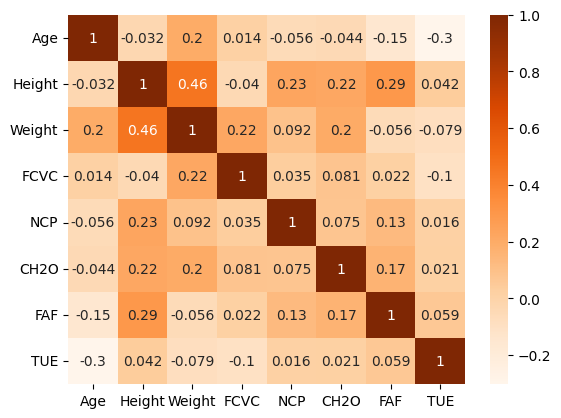

In [13]:
import seaborn as sns
sns.heatmap(
    df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes

In [14]:
data.corr().unstack().sort_values().drop_duplicates()
#checking correlation between variables

<ipython-input-14-34eef0e2a2a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().unstack().sort_values().drop_duplicates()


TUE     Age      -0.296931
FAF     Age      -0.144938
FCVC    TUE      -0.101135
TUE     Weight   -0.071561
Weight  FAF      -0.051436
Age     CH2O     -0.045304
NCP     Age      -0.043944
Height  FCVC     -0.038121
        Age      -0.025958
TUE     CH2O      0.011965
Age     FCVC      0.016291
FAF     FCVC      0.019939
NCP     TUE       0.036326
FCVC    NCP       0.042216
TUE     Height    0.051912
CH2O    NCP       0.057088
FAF     TUE       0.058562
FCVC    CH2O      0.068461
Weight  NCP       0.107469
NCP     FAF       0.129504
FAF     CH2O      0.167236
Weight  CH2O      0.200575
        Age       0.202560
CH2O    Height    0.213376
FCVC    Weight    0.216125
Height  NCP       0.243672
FAF     Height    0.294709
Height  Weight    0.463136
Age     Age       1.000000
dtype: float64

In [15]:
#Importing our dataset with H2O.
df = h2o.import_file('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
df.types

{'Gender': 'enum',
 'Age': 'real',
 'Height': 'real',
 'Weight': 'real',
 'family_history_with_overweight': 'enum',
 'FAVC': 'enum',
 'FCVC': 'real',
 'NCP': 'real',
 'CAEC': 'enum',
 'SMOKE': 'enum',
 'CH2O': 'real',
 'SCC': 'enum',
 'FAF': 'real',
 'TUE': 'real',
 'CALC': 'enum',
 'MTRANS': 'enum',
 'NObeyesdad': 'enum'}

In [17]:
df.describe()

Rows:2111
Cols:17

Gender    Age                 Height              Weight              family_history_with_overweight    FAVC    FCVC               NCP                 CAEC       SMOKE    CH2O                SCC    FAF                 TUE                 CALC        MTRANS                 NObeyesdad
-------  --------  ------------------  ------------------  ------------------  --------------------------------  ------  -----------------  ------------------  ---------  -------  ------------------  -----  ------------------  ------------------  ----------  ---------------------  -------------------
type     enum      real                real                real                enum                              enum    real               real                enum       enum     real                enum   real                real                enum        enum                   enum
mins               14.0                1.45                39.0                                                          1.0                1.0                                     1.0                        0.0                 0.0
mean               24.312599908574136  1.7016773533870204  86.58605812648032                                             2.419043061582189  2.6856280497394596                      2.0080114040738986         1.0102976958787304  0.6578659237328283
maxs               61.0                1.98                173.0                                                         3.0                4.0                                     3.0                        3.0                 2.0
sigma              6.345968273732234   0.09330481986792    26.191171745204677                                            0.5339265785033    0.7780386488418612                      0.6129534517968722         0.8505924308366978  0.6089272596763782
zeros              0                   0                   0                                                             0                  0                                       0                          411                 557
missing  0         0                   0                   0                   0                                 0       0                  0                   0          0        0                   0      0                   0                   0           0                      0
0        Female    21.0                1.62                64.0                yes                               no      2.0                3.0                 Sometimes  no       2.0                 no     0.0                 1.0                 no          Public_Transportation  Normal_Weight
1        Female    21.0                1.52                56.0                yes                               no      3.0                3.0                 Sometimes  yes      3.0                 yes    3.0                 0.0                 Sometimes   Public_Transportation  Normal_Weight
2        Male      23.0                1.8                 77.0                yes                               no      2.0                3.0                 Sometimes  no       2.0                 no     2.0                 1.0                 Frequently  Public_Transportation  Normal_Weight
3        Male      27.0                1.8                 87.0                no                                no      3.0                3.0                 Sometimes  no       2.0                 no     2.0                 0.0                 Frequently  Walking                Overweight_Level_I
4        Male      22.0                1.78                89.8                no                                no      2.0                1.0                 Sometimes  no       2.0                 no     0.0                 0.0                 Sometimes   Public_Transportation  Overweight_Level_II
5        Male      29.0                1.62                53.0                no                                yes     2.0                3.0                 Sometim

In [18]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [19]:
df_train

Gender      Age    Height    Weight  family_history_with_overweight    FAVC      FCVC    NCP  CAEC       SMOKE      CH2O  SCC      FAF    TUE  CALC        MTRANS                 NObeyesdad
--------  -----  --------  --------  --------------------------------  ------  ------  -----  ---------  -------  ------  -----  -----  -----  ----------  ---------------------  -------------------
Female       21      1.62      64    yes                               no           2      3  Sometimes  no            2  no         0      1  no          Public_Transportation  Normal_Weight
Female       21      1.52      56    yes                               no           3      3  Sometimes  yes           3  yes        3      0  Sometimes   Public_Transportation  Normal_Weight
Male         23      1.8       77    yes                               no           2      3  Sometimes  no            2  no         2      1  Frequently  Public_Transportation  Normal_Weight
Male         27      1.8       87    no                                no           3      3  Sometimes  no            2  no         2      0  Frequently  Walking                Overweight_Level_I
Male         22      1.78      89.8  no                                no           2      1  Sometimes  no            2  no         0      0  Sometimes   Public_Transportation  Overweight_Level_II
Male         29      1.62      53    no                                yes          2      3  Sometimes  no            2  no         0      0  Sometimes   Automobile             Normal_Weight
Female       23      1.5       55    yes                               yes          3      3  Sometimes  no            2  no         1      0  Sometimes   Motorbike              Normal_Weight
Male         22      1.64      53    no                                no           2      3  Sometimes  no            2  no         3      0  Sometimes   Public_Transportation  Normal_Weight
Male         24      1.78      64    yes                               yes          3      3  Sometimes  no            2  no         1      1  Frequently  Public_Transportation  Normal_Weight
Male         22      1.72      68    yes                               yes          2      3  Sometimes  no            2  no         1      1  no          Public_Transportation  Normal_Weight
[1455 rows x 17 columns]

In [20]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "NObeyesdad"
x = df.columns
x.remove(y)

In [21]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters.
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", though they are really good.
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [22]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which
#variable will it be using for the prediction purposes.
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
05:43:18.877: Project: AutoML_1_20240219_54318
05:43:18.878: Cross-validation disabled by user: no fold column nor nfolds > 1.
05:43:18.879: Setting stopping tolerance adaptively based on the training frame: 0.026216125254653815
05:43:18.881: Build control seed: 10
05:43:18.884: training frame: Frame key: AutoML_1_20240219_54318_training_py_2_sid_83b1    cols: 17    rows: 1455  chunks: 8    size: 92868  checksum: -2556935367076130630
05:43:18.885: validation frame: Frame key: py_4_sid_83b1    cols: 17    rows: 331  chunks: 8    size: 58194  checksum: 7601564580573278705
05:43:18.887: leaderboard frame: Frame key: py_4_sid_83b1    cols: 17    rows: 331  chunks: 8    size: 58194  checksum: 7601564580573278705
05:43:18.887: blending frame: NULL
05:43:18.888: response column: NObeyesdad
05:43:18.888: fold column: null
05:43:18.888: weights column: null
05:43:18.953: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w),

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240219_54318


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 525                         286556                 3            7            6.98857       4             65            38.7524

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 2.874562509130332e-05
RMSE: 0.005361494669521114
LogLoss: 0.002647982800407125
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error    Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  -------  ---------
176                    0                0                 0                  0                   0                     0                      0        0 / 176
0                      209              0                 0                  0                   0                     0                      0        0 / 209
0                      0                230               0                  0                   0                     0                      0        0 / 230
0                      0                0                 212                0                   0                     0                      0        0 / 212
0                      0                0                 0                  227                 0                     0                      0        0 / 227
0                      0                0                 0                  0                   212                   0                      0        0 / 212
0                      0                0                 0                  0                   0                     189                    0        0 / 189
176                    209              230               212                227                 212                   189                    0        0 / 1,455

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1
7    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.028279839935683296
RMSE: 0.16816610816595387
LogLoss: 0.10788231584966423
Mean Per-Class Error: 0.03138226160303469
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
42                     0                0                 0                  0                   0                     0                      0          0 / 42
0                      36               0       

In [23]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well.
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .

lb = aml.leaderboard

In [24]:
lb.head()

model_id                             mean_per_class_error    logloss      rmse        mse
---------------------------------  ----------------------  ---------  --------  ---------
GBM_2_AutoML_1_20240219_54318                   0.0313823   0.107882  0.168166  0.0282798
GBM_5_AutoML_1_20240219_54318                   0.036503    0.108258  0.167945  0.0282054
XRT_1_AutoML_1_20240219_54318                   0.0376682   0.291475  0.289048  0.0835485
XGBoost_3_AutoML_1_20240219_54318               0.0383489   0.128069  0.185615  0.0344529
GBM_3_AutoML_1_20240219_54318                   0.0416668   0.110258  0.170642  0.0291186
DRF_1_AutoML_1_20240219_54318                   0.0427263   0.340528  0.266111  0.0708152
GBM_4_AutoML_1_20240219_54318                   0.0433285   0.118431  0.185541  0.0344254
GBM_1_AutoML_1_20240219_54318                   0.047859    0.128412  0.179936  0.0323771
XGBoost_2_AutoML_1_20240219_54318               0.0546575   0.165209  0.214721  0.0461049
XGBoost_1_AutoML_1_20240219_54318               0.0573422   0.199314  0.233053  0.0543137
[10 rows x 5 columns]

In [25]:
#Using the leader model for prediction.
OverWeight_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [26]:
OverWeight_pred.head()
#predicitions

predict                Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II
-------------------  ---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------
Normal_Weight                  0.0193922         0.975553         0.00108582         0.000245843         0.00023717            0.00224256             0.00124344
Overweight_Level_II            0.000297479       0.0258406        0.00149391         0.000191166         0.000130023           0.0043474              0.967699
Overweight_Level_I             4.88726e-05       0.00186693       0.000265903        3.66741e-05         4.75347e-05           0.996091               0.00164316
Normal_Weight                  0.000141328       0.8666           0.000366789        6.05408e-05         5.94556e-05           0.132251               0.000520128
Normal_Weight                  0.000266708       0.98285          0.000158226        0.000116102         4.90377e-05           0.0147989              0.00176146
Normal_Weight                  0.104515          0.890424         0.000467935        0.000182098         0.000139688           0.00216469             0.00210646
Normal_Weight                  0.000272039       0.999021         3.03663e-05        1.52002e-05         1.20509e-05           0.000532051            0.000117239
Overweight_Level_II            0.00044887        0.00743319       0.0589565          0.000356837         0.000140382           0.0195891              0.913075
Insufficient_Weight            0.715776          0.279053         0.000870464        0.000192538         0.000393355           0.00240361             0.00131078
Normal_Weight                  0.00328009        0.852906         0.00476581         0.000298447         0.000145329           0.12199                0.0166137
[10 rows x 8 columns]

In [27]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.020195946607926302
RMSE: 0.14211244353654012
LogLoss: 0.07753504937117557
Mean Per-Class Error: 0.028753072414445073
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  -------
54                     0                0                 0                  0                   0                     0                      0          0 / 54
1                      38               0                 0                  0                   2                     0                      0.0731707  3 / 41
0                      0                59                0                  0                   1                     0                      0.0166667  1 / 60
0                      0                0                 39                 0                   0                     0                      0          0 / 39
0                      0                0                 0                  40                  0                     0                      0          0 / 40
0                      3                0                 0                  0                   40                    0                      0.0697674  3 / 43
0                      0                1                 0                  0                   1                     46                     0.0416667  2 / 48
55                     41               60                39                 40                  44                    46                     0.0276923  9 / 325

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.972308
2    0.996923
3    1
4    1
5    1
6    1
7    1

In [28]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [29]:
model_ids
#all the models that were used in the automl are below

['GBM_2_AutoML_1_20240219_54318',
 'GBM_5_AutoML_1_20240219_54318',
 'XRT_1_AutoML_1_20240219_54318',
 'XGBoost_3_AutoML_1_20240219_54318',
 'GBM_3_AutoML_1_20240219_54318',
 'DRF_1_AutoML_1_20240219_54318',
 'GBM_4_AutoML_1_20240219_54318',
 'GBM_1_AutoML_1_20240219_54318',
 'XGBoost_2_AutoML_1_20240219_54318',
 'XGBoost_1_AutoML_1_20240219_54318']

In [30]:
aml.leader.confusion_matrix(df_test)
#Using confusion matrix to

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  -------
54                     0                0                 0                  0                   0                     0                      0          0 / 54
1                      38               0                 0                  0                   2                     0                      0.0731707  3 / 41
0                      0                59                0                  0                   1                     0                      0.0166667  1 / 60
0                      0                0                 39                 0                   0                     0                      0          0 / 39
0                      0                0                 0                  40                  0                     0                      0          0 / 40
0                      3                0                 0                  0                   40                    0                      0.0697674  3 / 43
0                      0                1                 0                  0                   1                     46                     0.0416667  2 / 48
55                     41               60                39                 40                  44                    46                     0.0276923  9 / 325

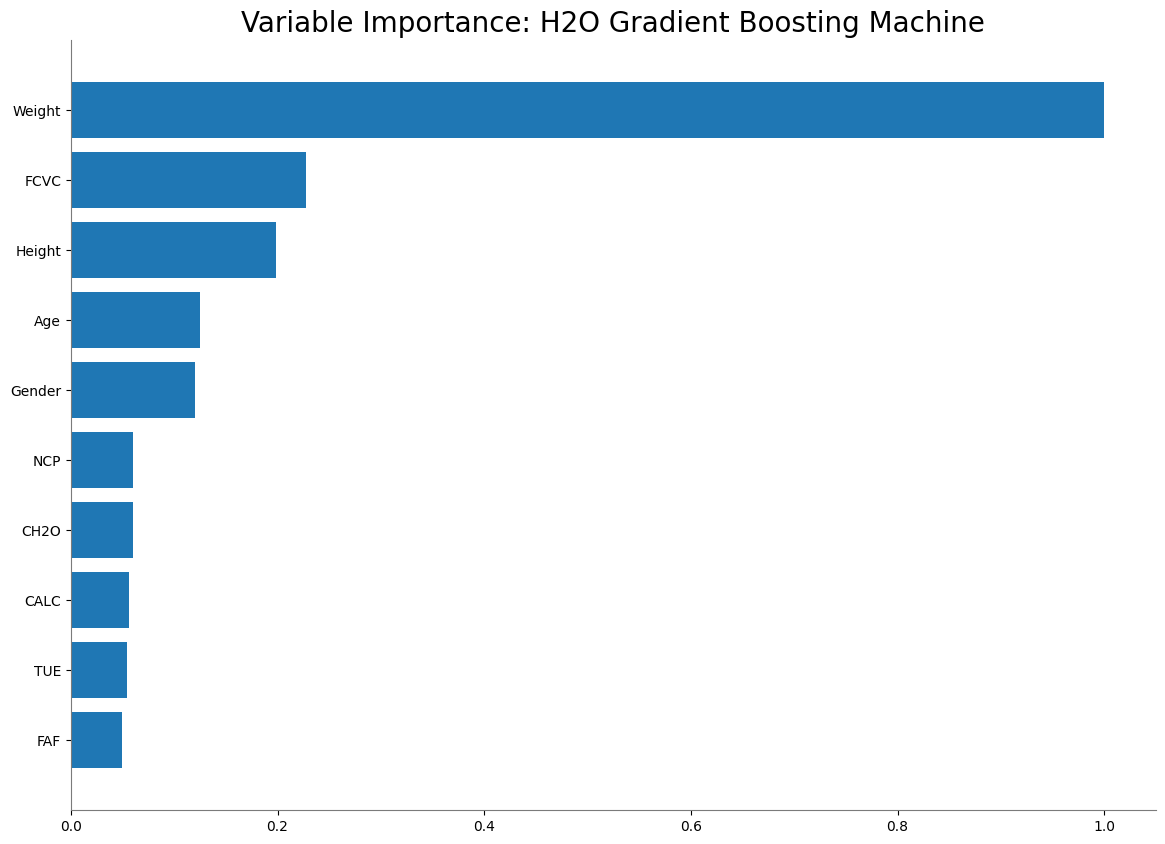

<Figure size 640x480 with 0 Axes>

In [31]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.

In [32]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'GBM_2_AutoML_1_20240219_54318': 0}

In [33]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [34]:
best_model.algo

'gbm'

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-35-a0f01d27643e>:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


**Conclusion**

*Evaluation:*

 We can evaluate our model by using the above confusion matrix from it we can say that the error and rate of error in the cofusion matrix are significantly low suggesting that the model is working perfectly.

Also while evaluating all the model we can see that present leader model ("GBM_5_AutoML_1_20221107_231030") has the least amount of mean_per_class_error and logloss as well. Which also suggests that our model fuctions perfectly.

The model also gives the most important variables as height,weight and fcvc suggesting rents dependence on it. Also we know since the model thats involved GBM handles Overfitting finely as well.

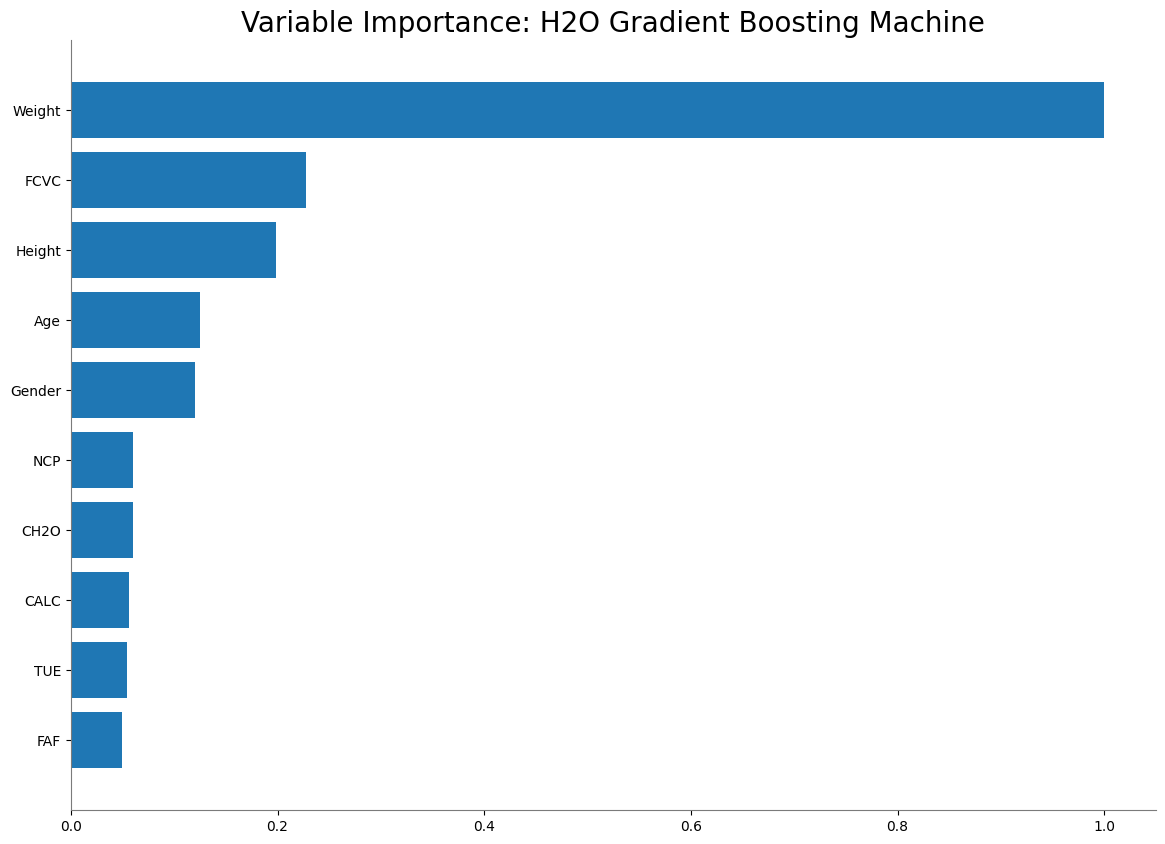

<Figure size 640x480 with 0 Axes>

In [36]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

In [39]:
print(best_model.rmse(train=True))

0.005361494669521114


In [40]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [41]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.020195946607926302,
 'rmse': 0.14211244353654012,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.07753504937117557,
 'auc': 'NaN'}

In [42]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [43]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
                 predict  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
0          Normal_Weight             0.019392       0.975553        0.001086   
1    Overweight_Level_II             0.000297       0.025841        0.001494   
2     Overweight_Level_I             0.000049       0.001867        0.000266   
3          Normal_Weight             0.000141       0.866600        0.000367   
4          Normal_Weight             0.000267       0.982850        0.000158   
..                   ...                  ...            ...             ...   
320     Obesity_Type_III             0.000001       0.000005        0.000005   
321     Obesity_Type_III             0.000001       0.000005        0.000007   
322     Obesity_Type_III             0.000001       0.000004        0.000032   
323     Obesity_Type_III             0.000002       0.000004        0.000008   
324     Obesity_Type_III 

In [44]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


NObeyesdad
0          Normal_Weight
1    Overweight_Level_II
2     Overweight_Level_I
3          Normal_Weight
4          Normal_Weight
..                   ...
320     Obesity_Type_III
321     Obesity_Type_III
322     Obesity_Type_III
323     Obesity_Type_III
324     Obesity_Type_III

[325 rows x 1 columns]

In [49]:
print(x)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


REGULARIZATION

Since H2O directly won't support regularization for categorical columns. I am skipping this part.


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                             mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  -------
GBM_5_AutoML_1_20240219_54318                   0.0159126  0.0628477  0.12308   0.0151487                1642                   0.249719  GBM
GBM_1_AutoML_1_20240219_54318                   0.0192349  0.0869183  0.149401  0.0223206                6410                   0.315827  GBM
XGBoost_3_AutoML_1_20240219_54318               0.0225571  0.0929209  0.151578  0.0229758                1087                   0.033395  XGBoost
GBM_3_AutoML_1_20240219_54318                   0.024776   0.0742504  0.143406  0.0205652                2718                   0.259741  GBM
GBM_2_AutoML_1_20240219_54318                   0.0287531  0.077535   0.142112  0.0201959                2955                   0.290807  GBM
GBM_4_AutoML_1_20240219_54318                   0.0325835  0.0691186  0.141444  0.0200064                3358                   0.264585  GBM
XGBoost_2_AutoML_1_20240219_54318               0.0387133  0.128418   0.185597  0.0344461                5094                   0.018272  XGBoost
DRF_1_AutoML_1_20240219_54318                   0.0427235  0.248052   0.267851  0.0717442                2059                   0.212986  DRF
XGBoost_1_AutoML_1_20240219_54318               0.0448277  0.19361    0.224589  0.0504402                8629                   0.078369  XGBoost
XRT_1_AutoML_1_20240219_54318                   0.0470742  0.300488   0.29378   0.0863069                1778                   0.200582  DRF
[10 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_1_20240219_54318

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  -------
54                     0                0                 0                  0                   0                     0                      0          0 / 54
1                      38               0                 0                  0                   2                     0                      0.0731707  3 / 41
0                      0                59                0                  0                   1                     0                      0.0166667  1 / 60
0                      0                0                 39                 0                   0                     0                      0          0 / 39
0                      0                0                 0                  40                  0                     0                      0          0 / 40
0                      3                0                 0                  0                   40                    0                      0.0697674  3 / 43
0                      0                1                 0                  0                   1                     46                     0.0416667  2 / 48
55                     41               60                39                 40                  44                    46                     0.0276923  9 / 325

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

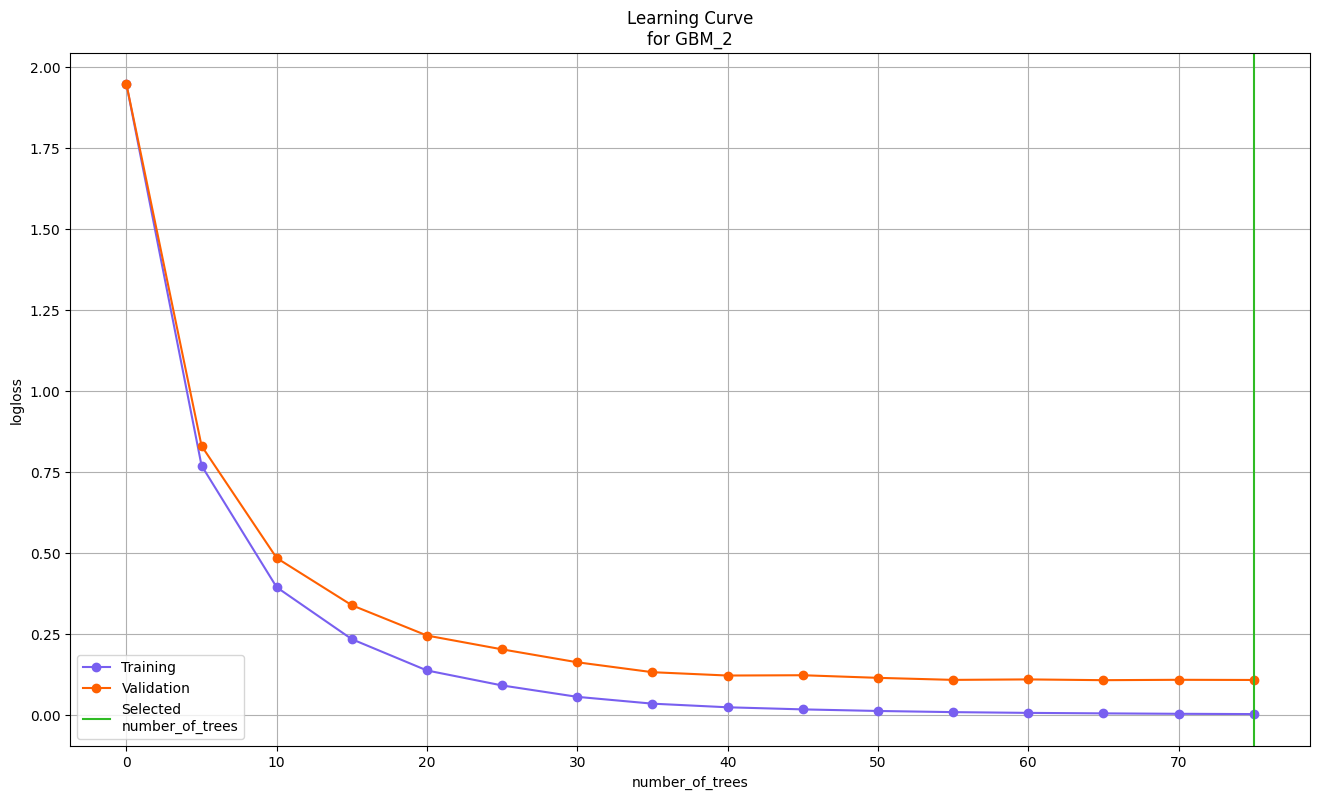

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

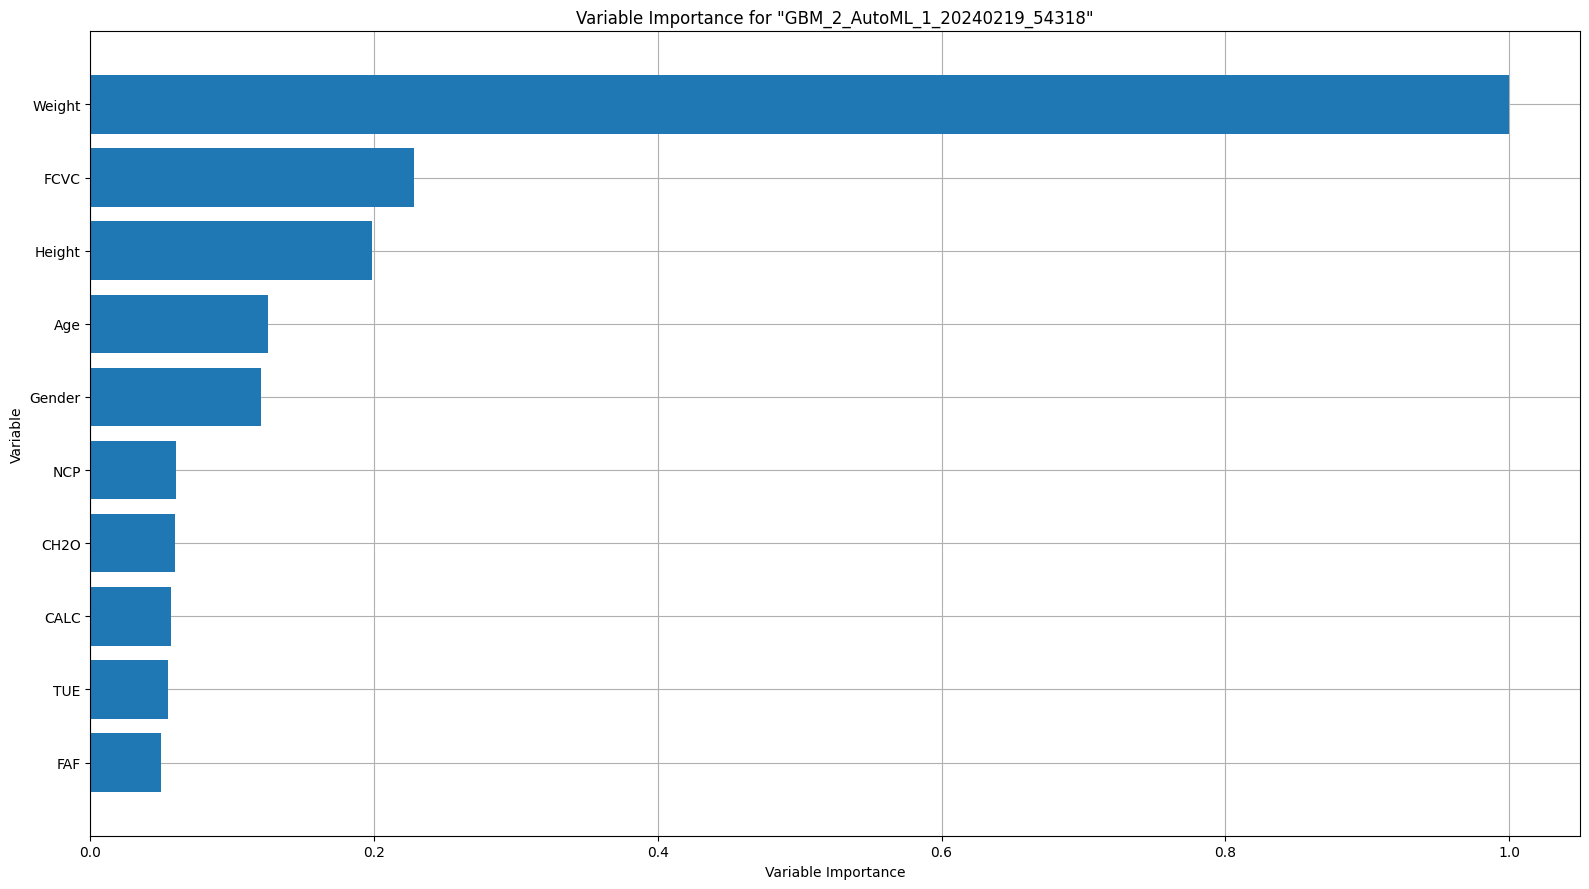

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

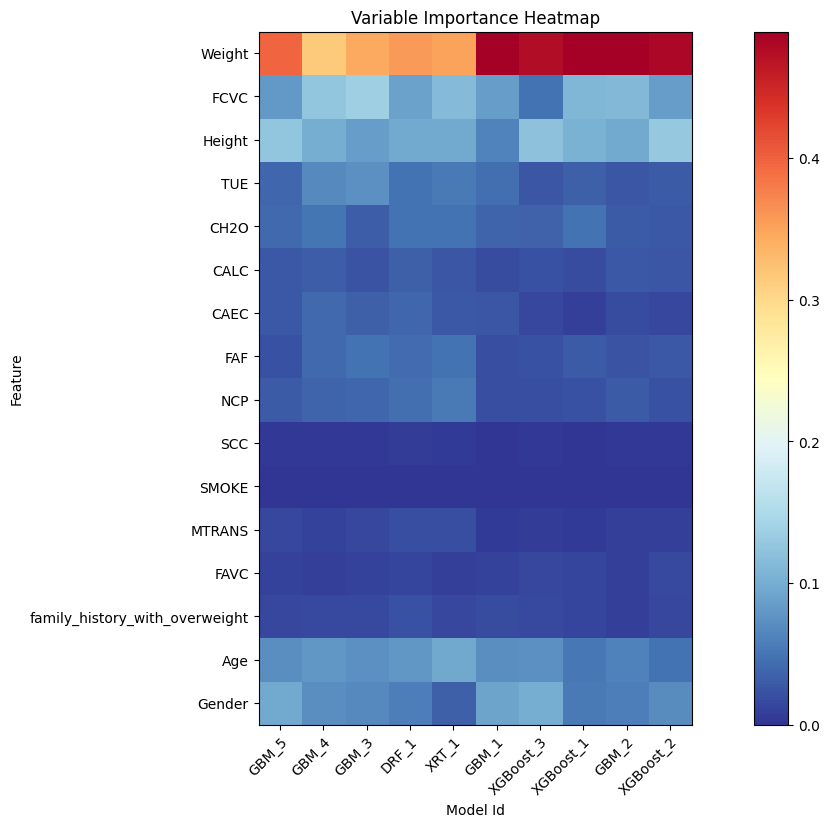

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

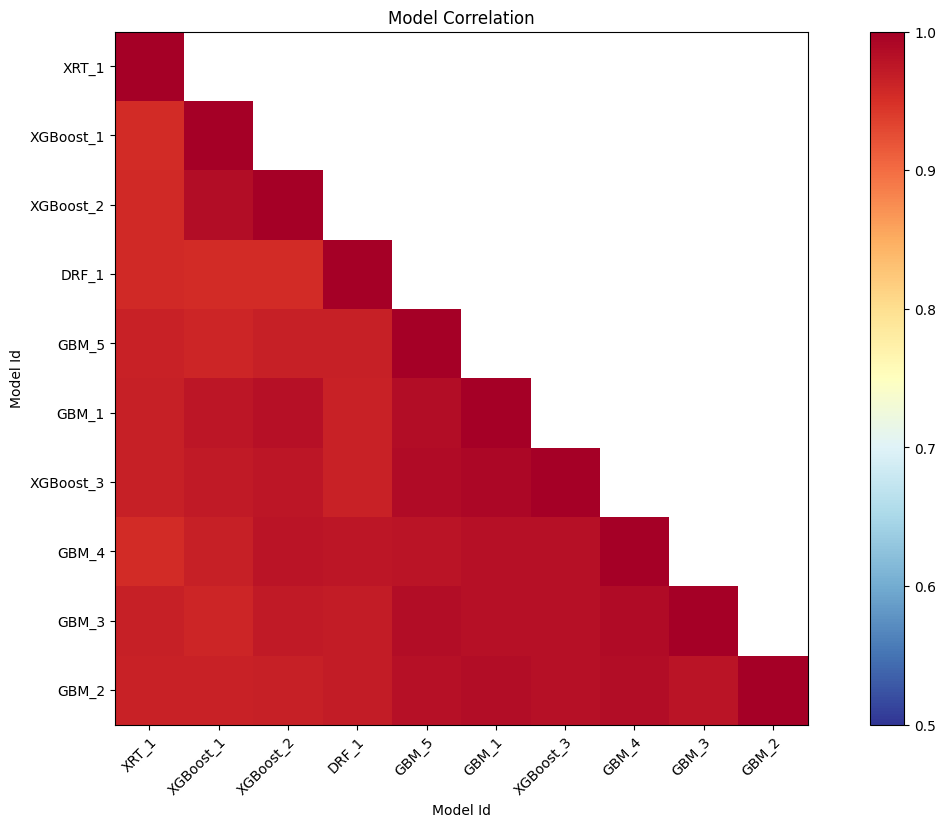

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

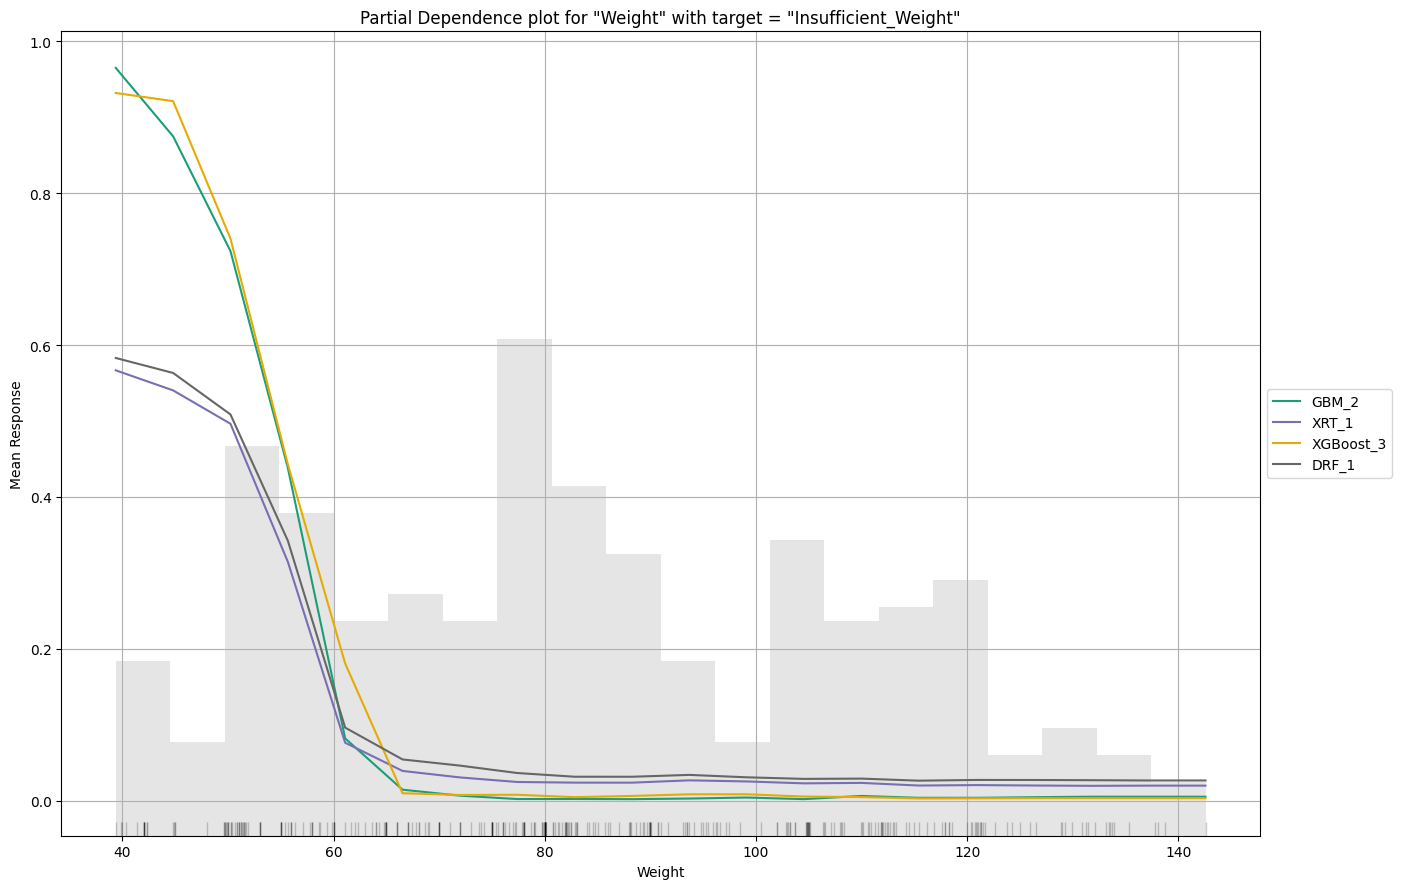

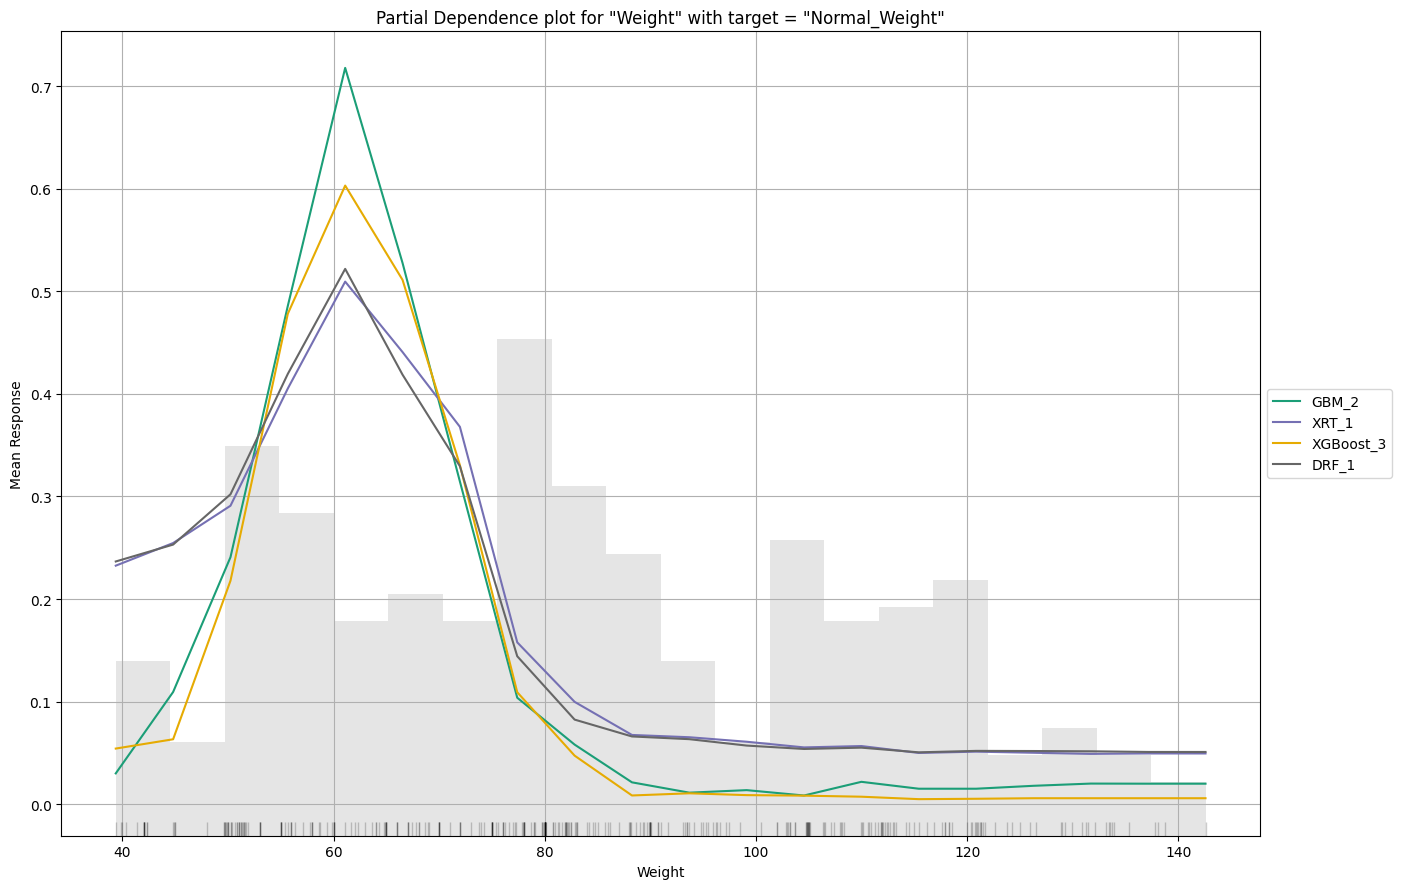

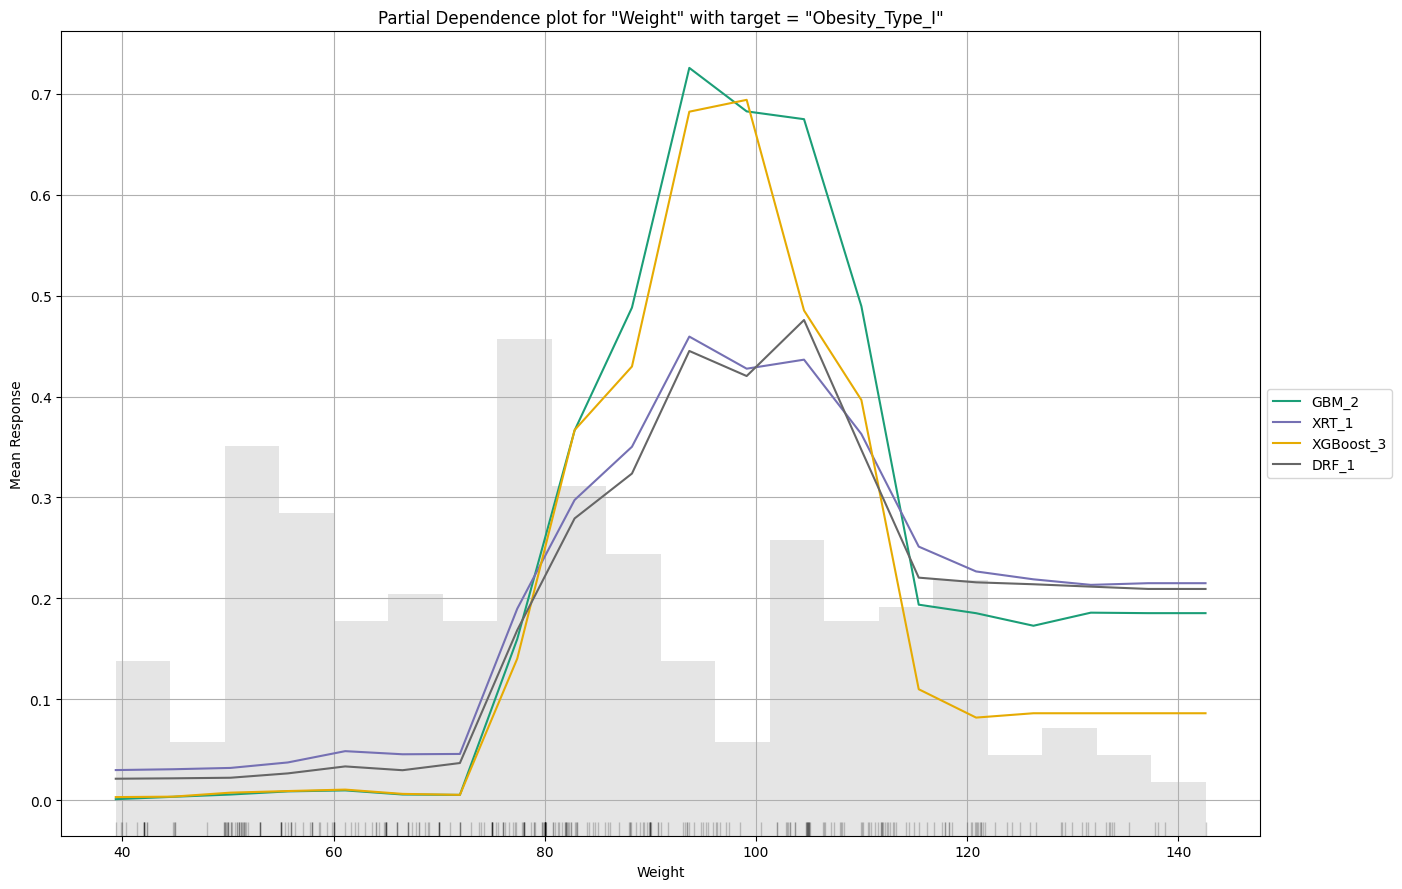

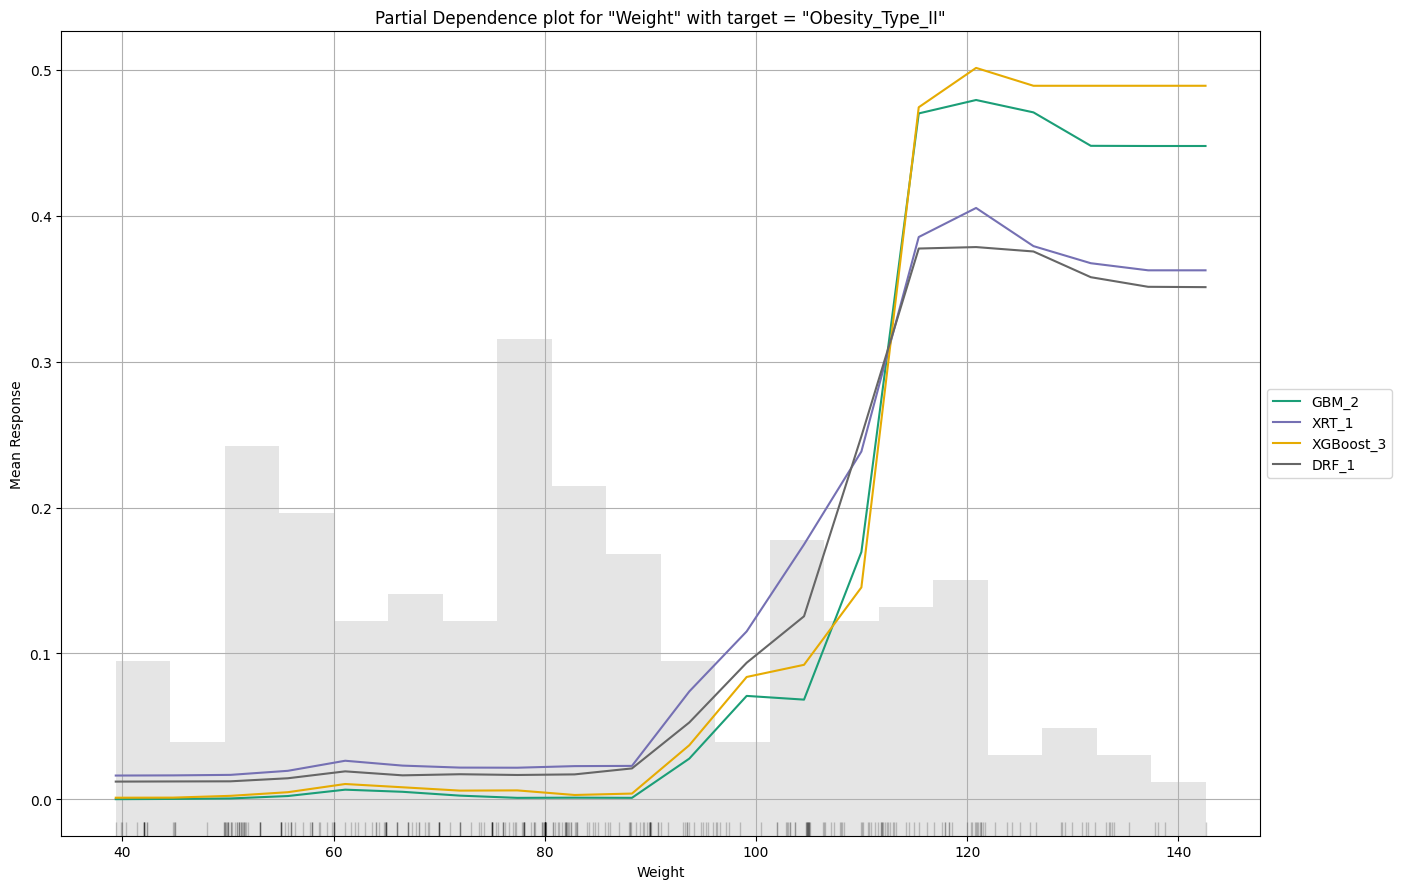

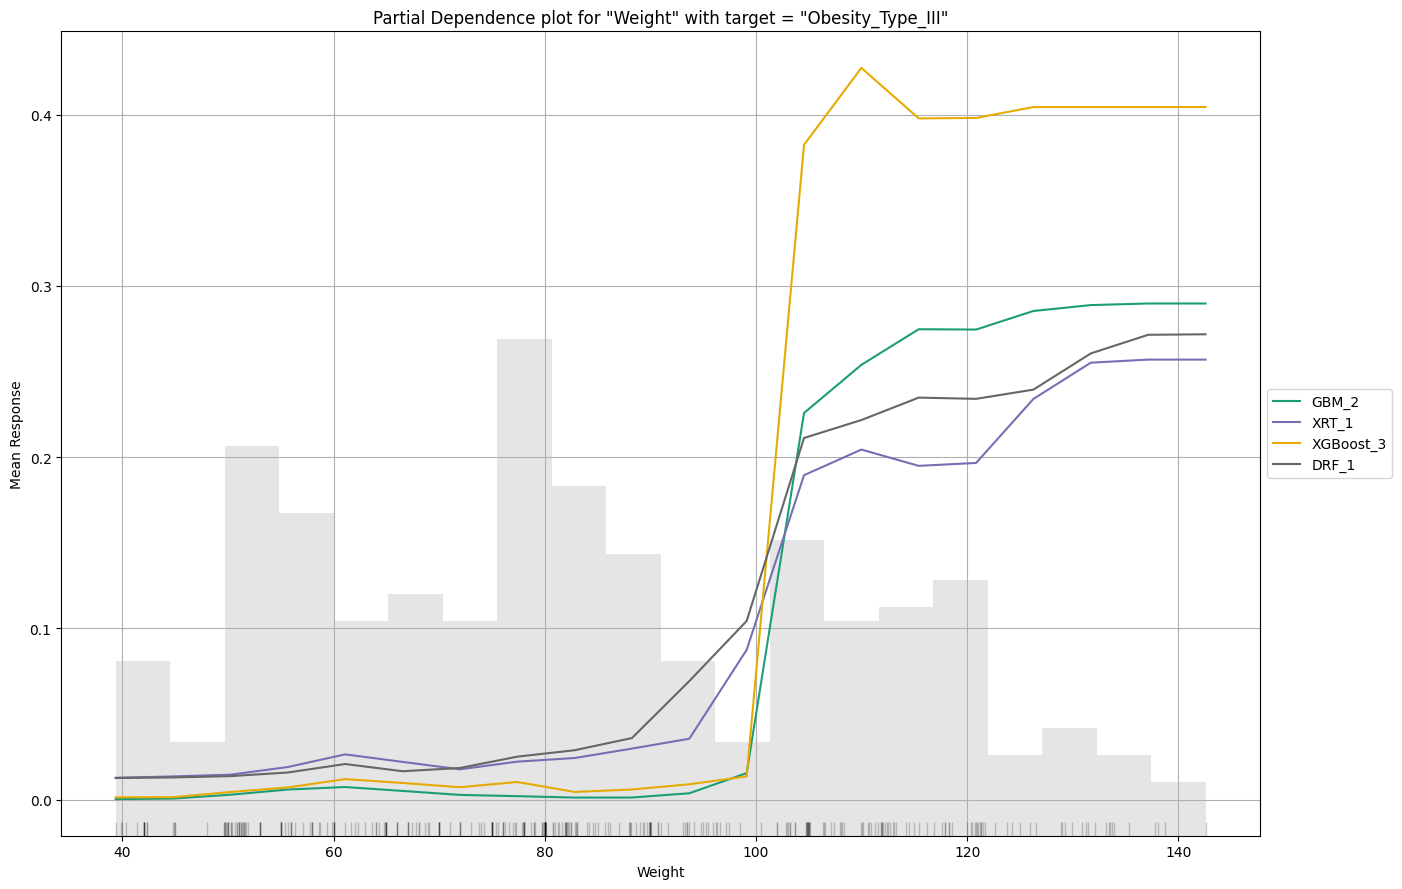

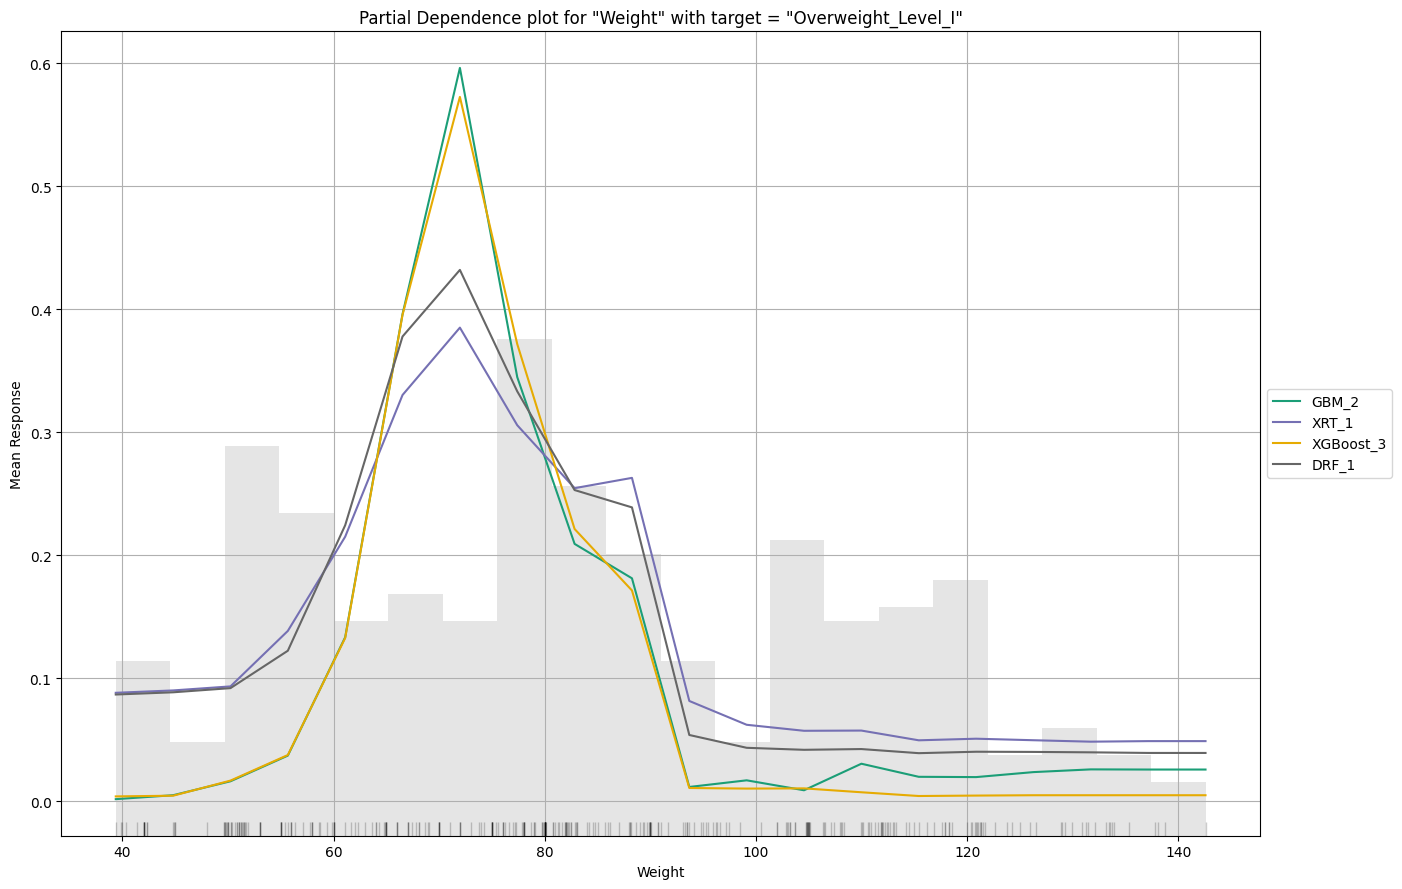

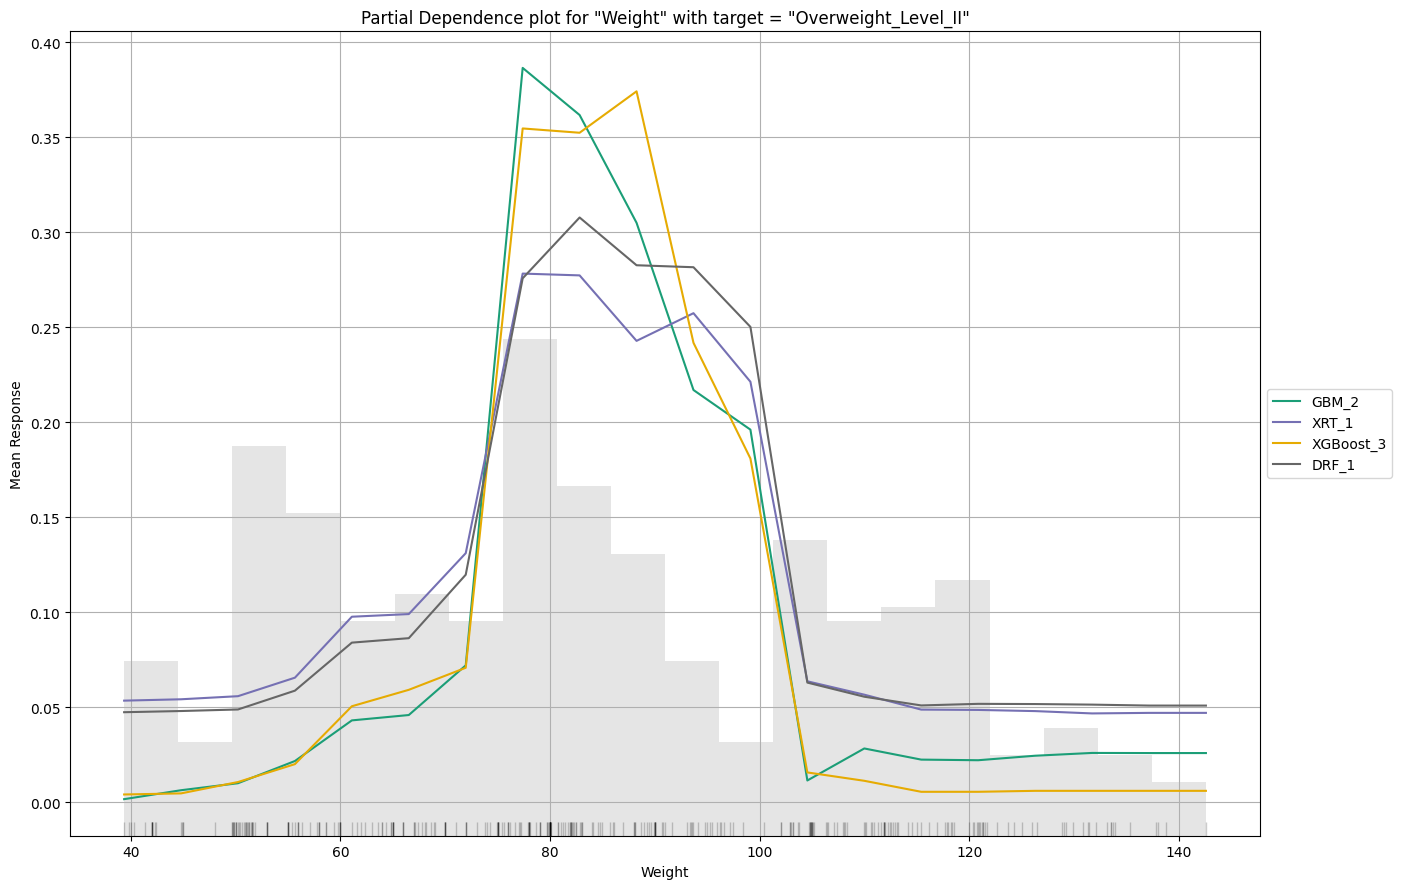

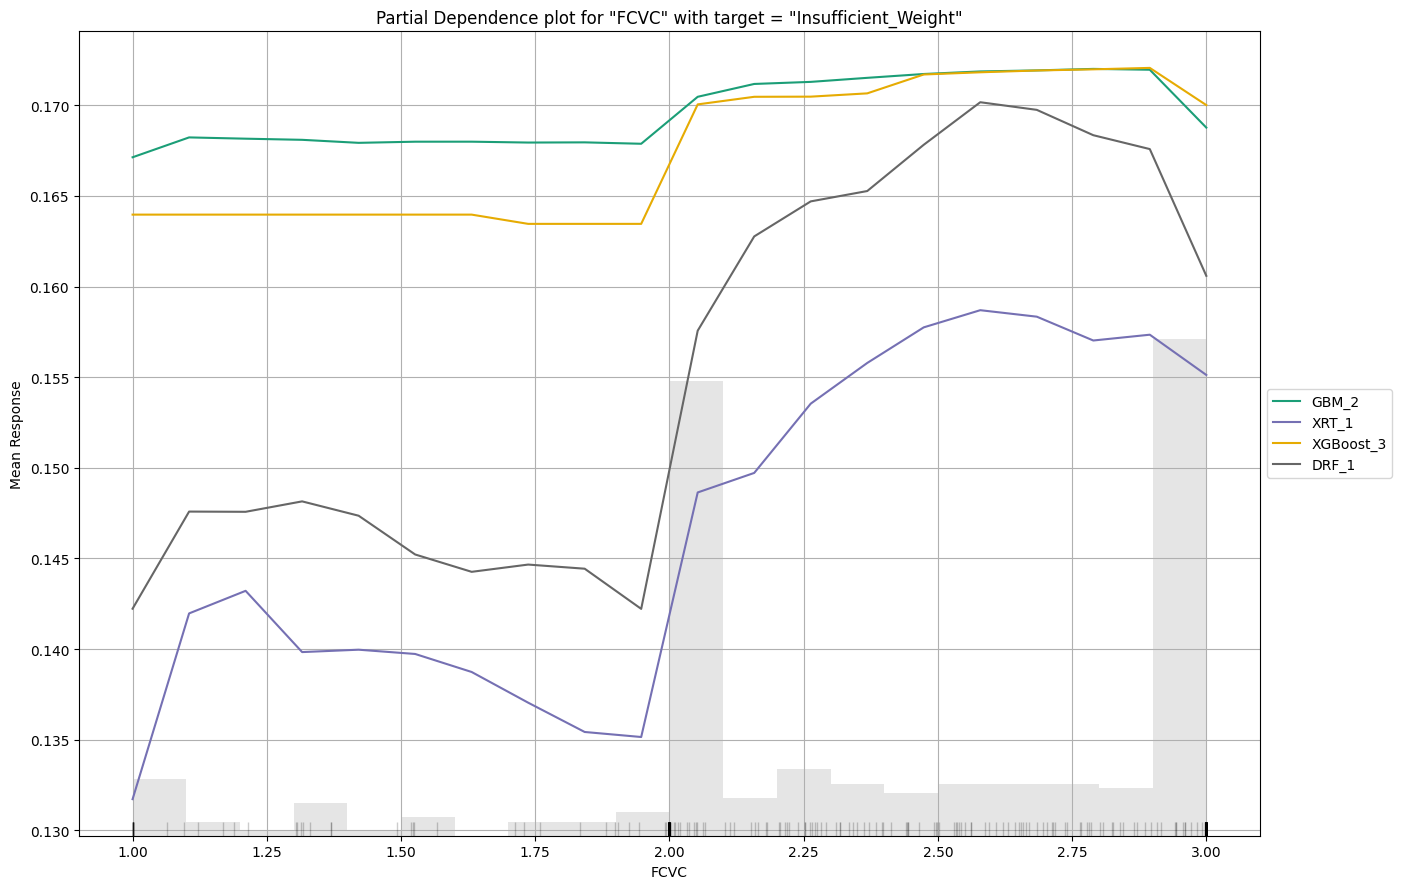

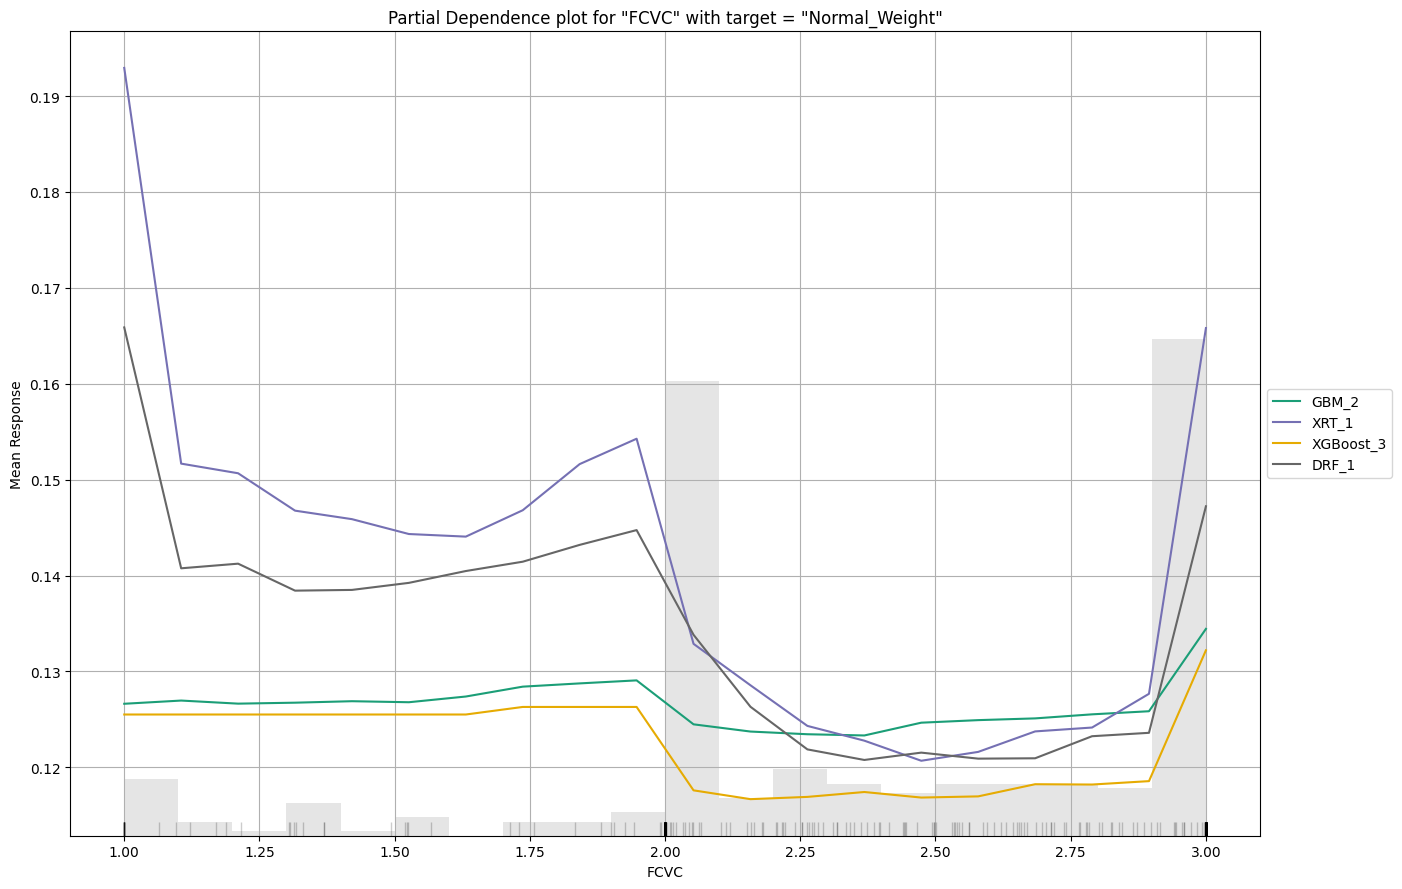

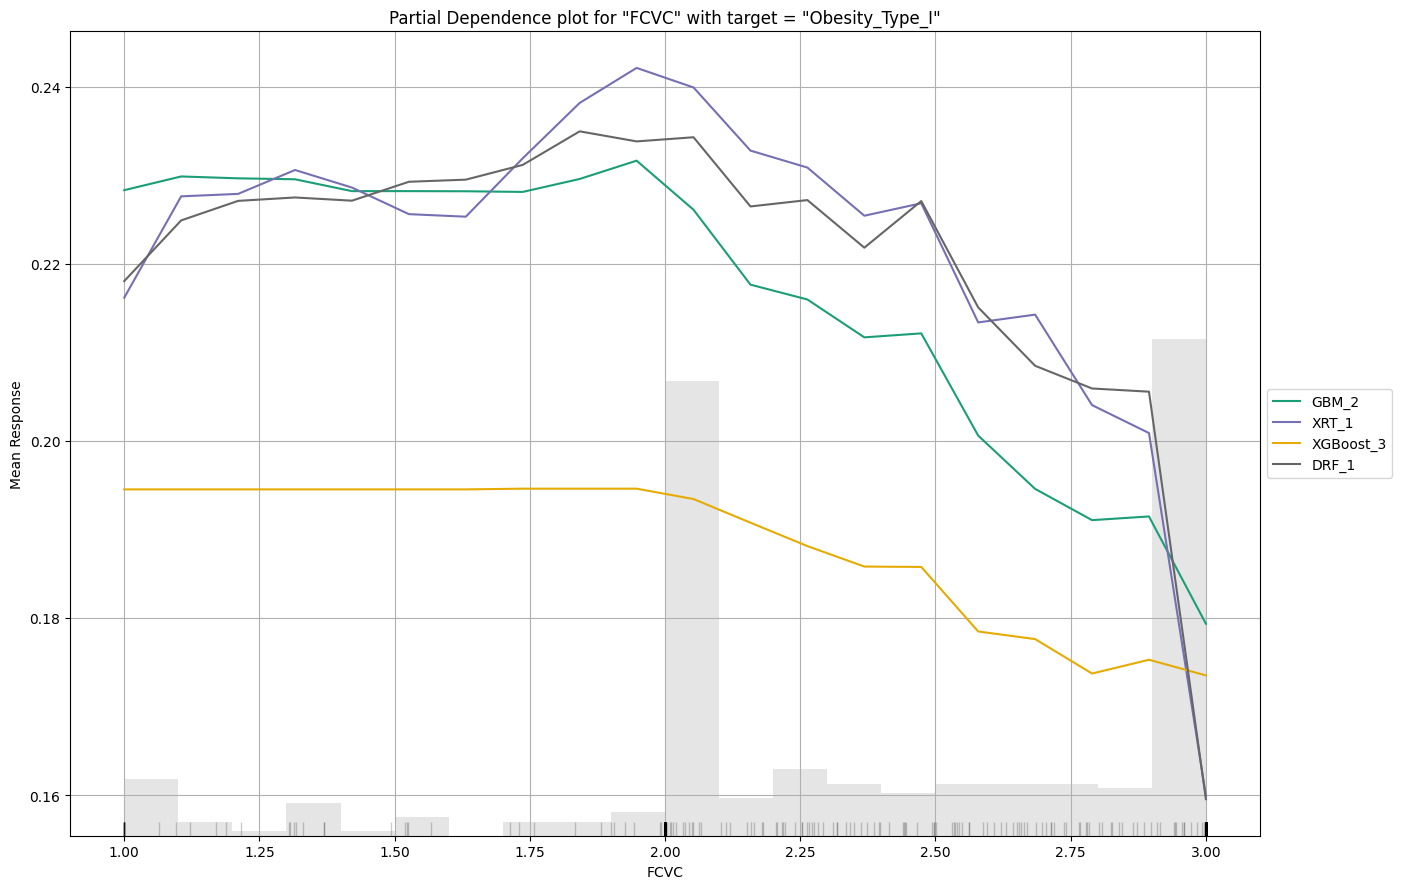

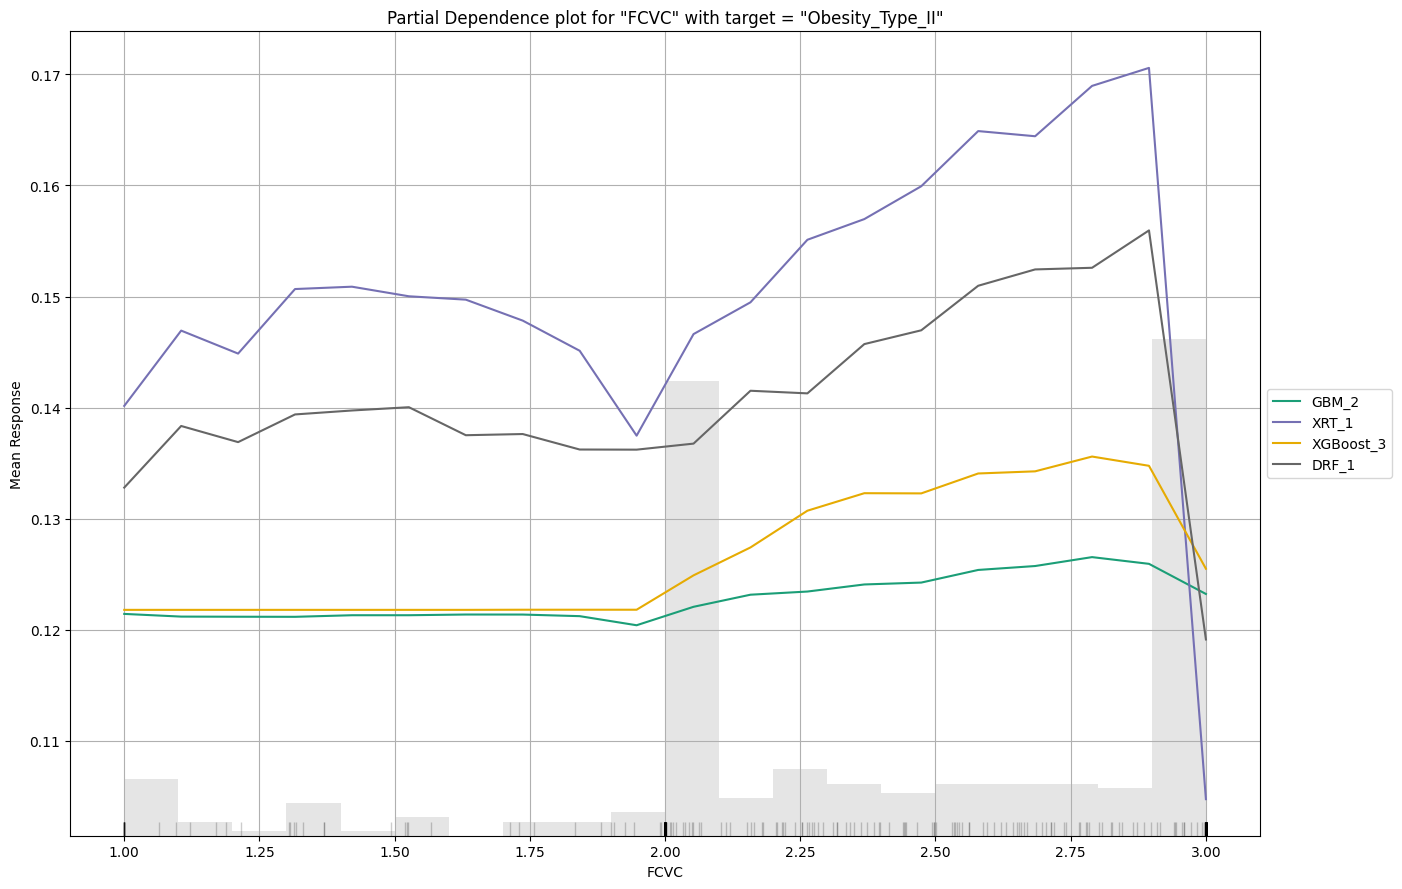

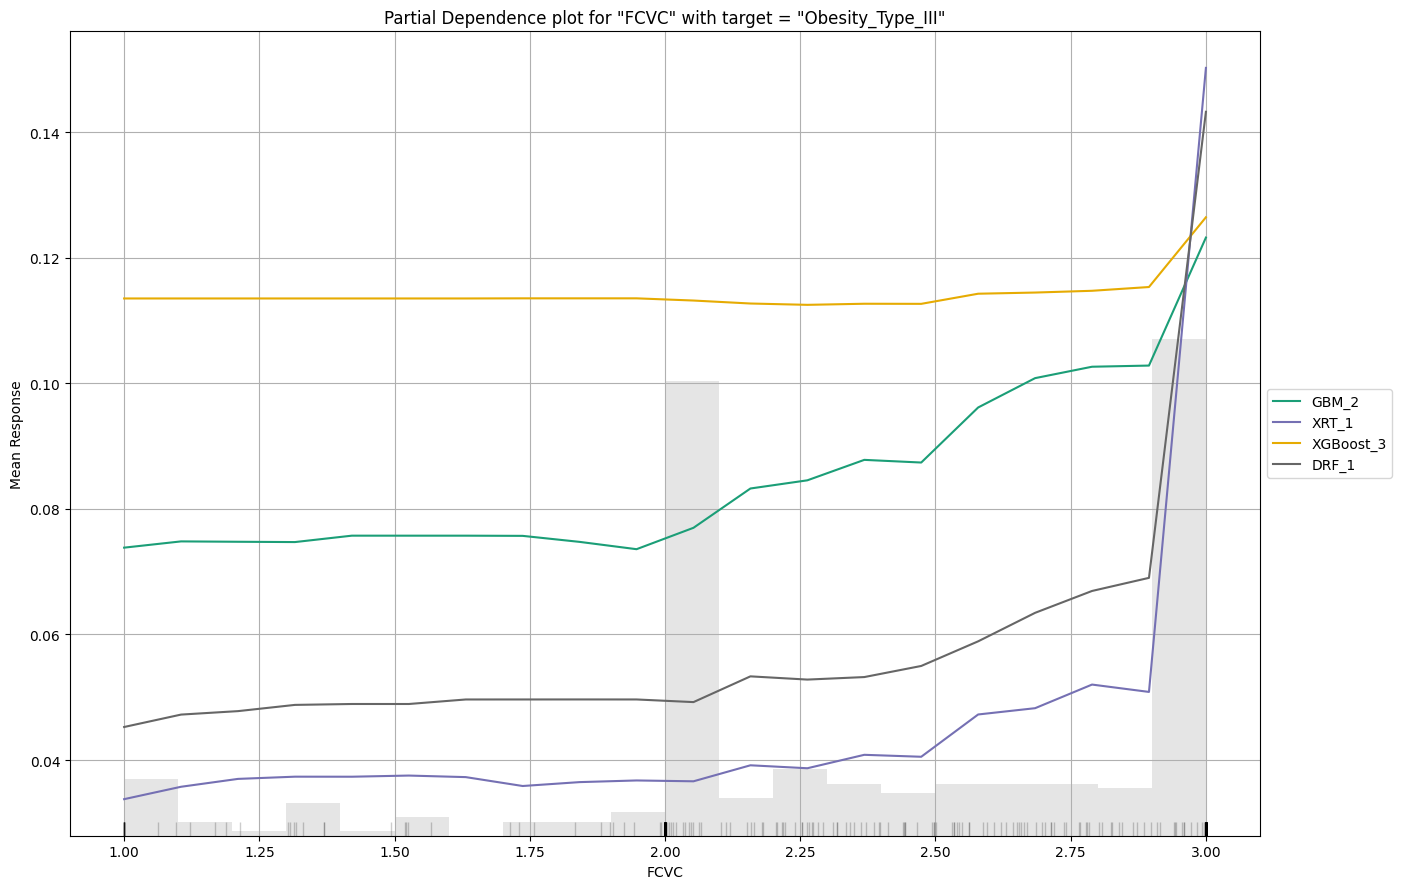

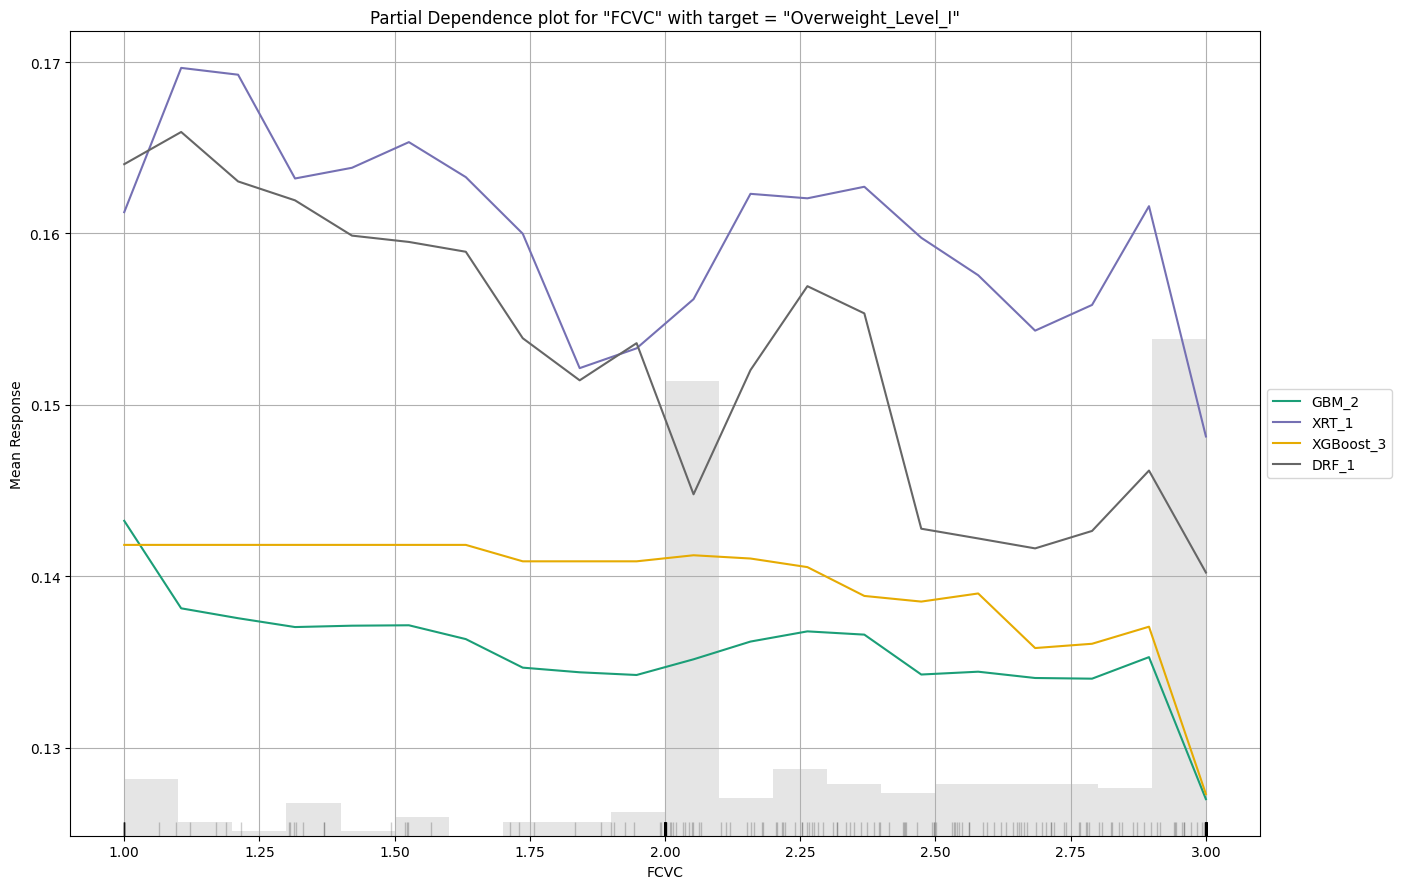

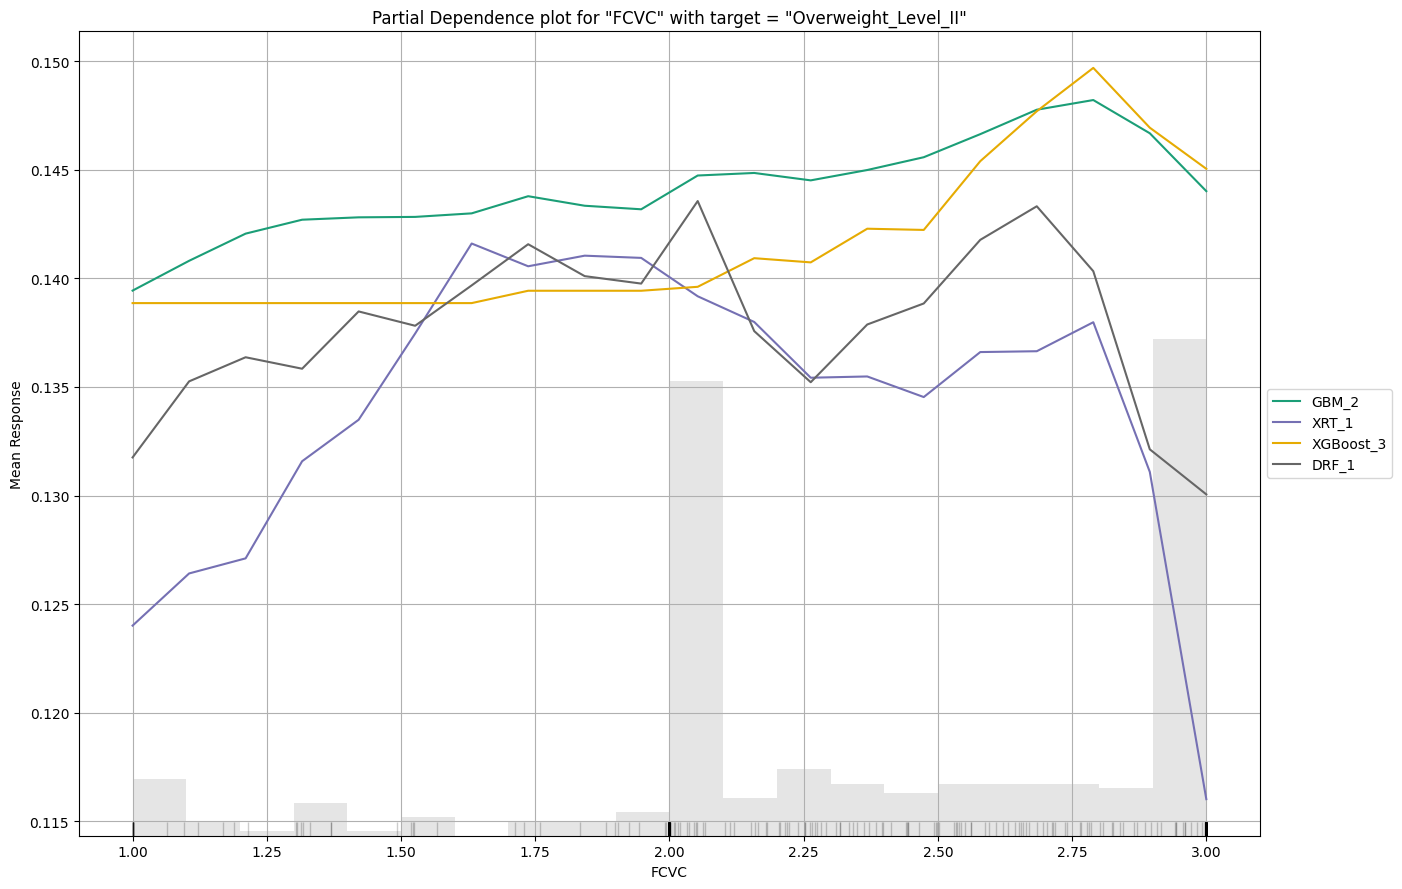

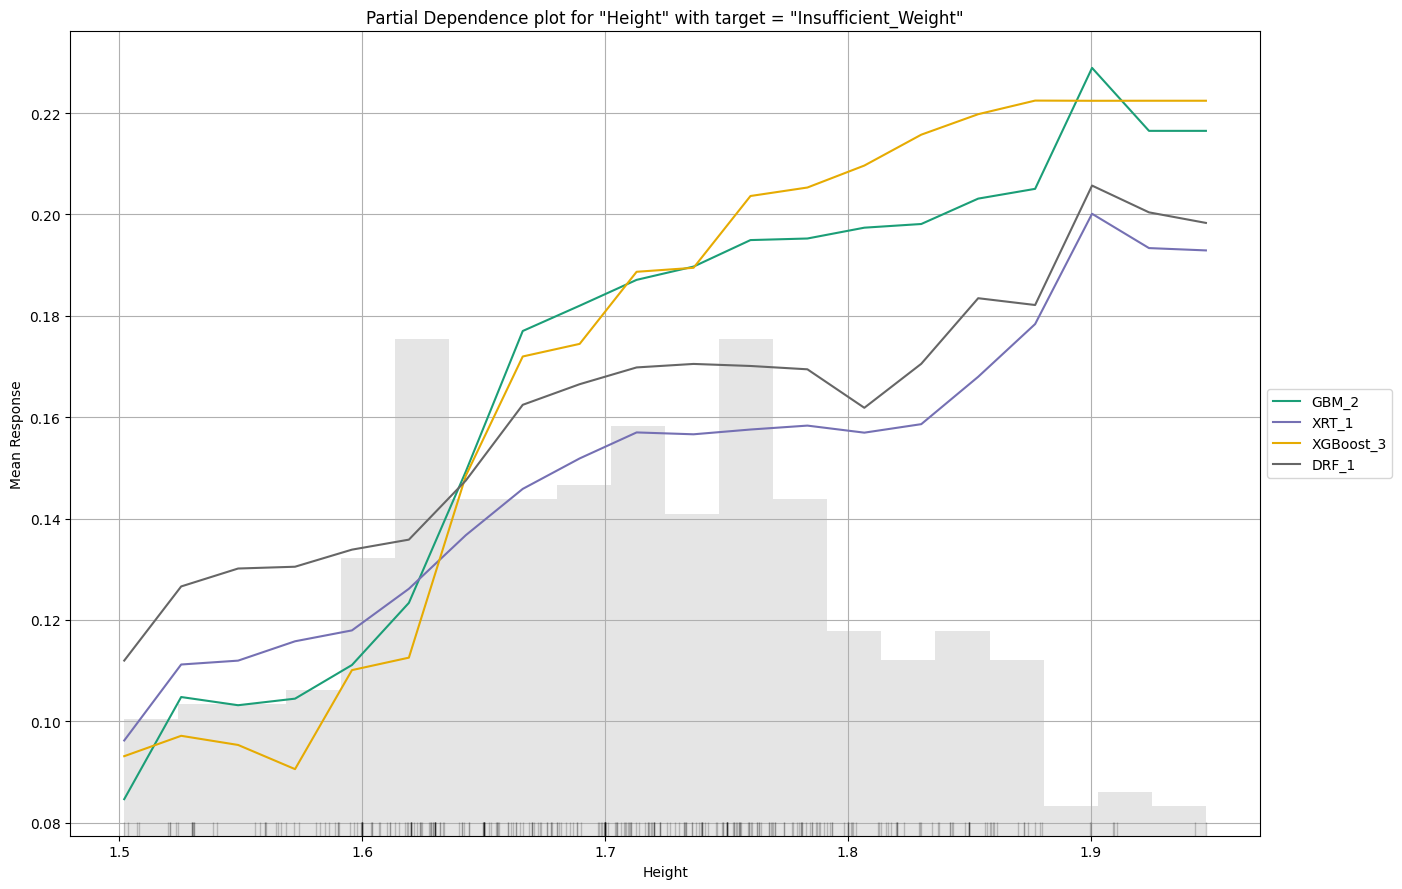

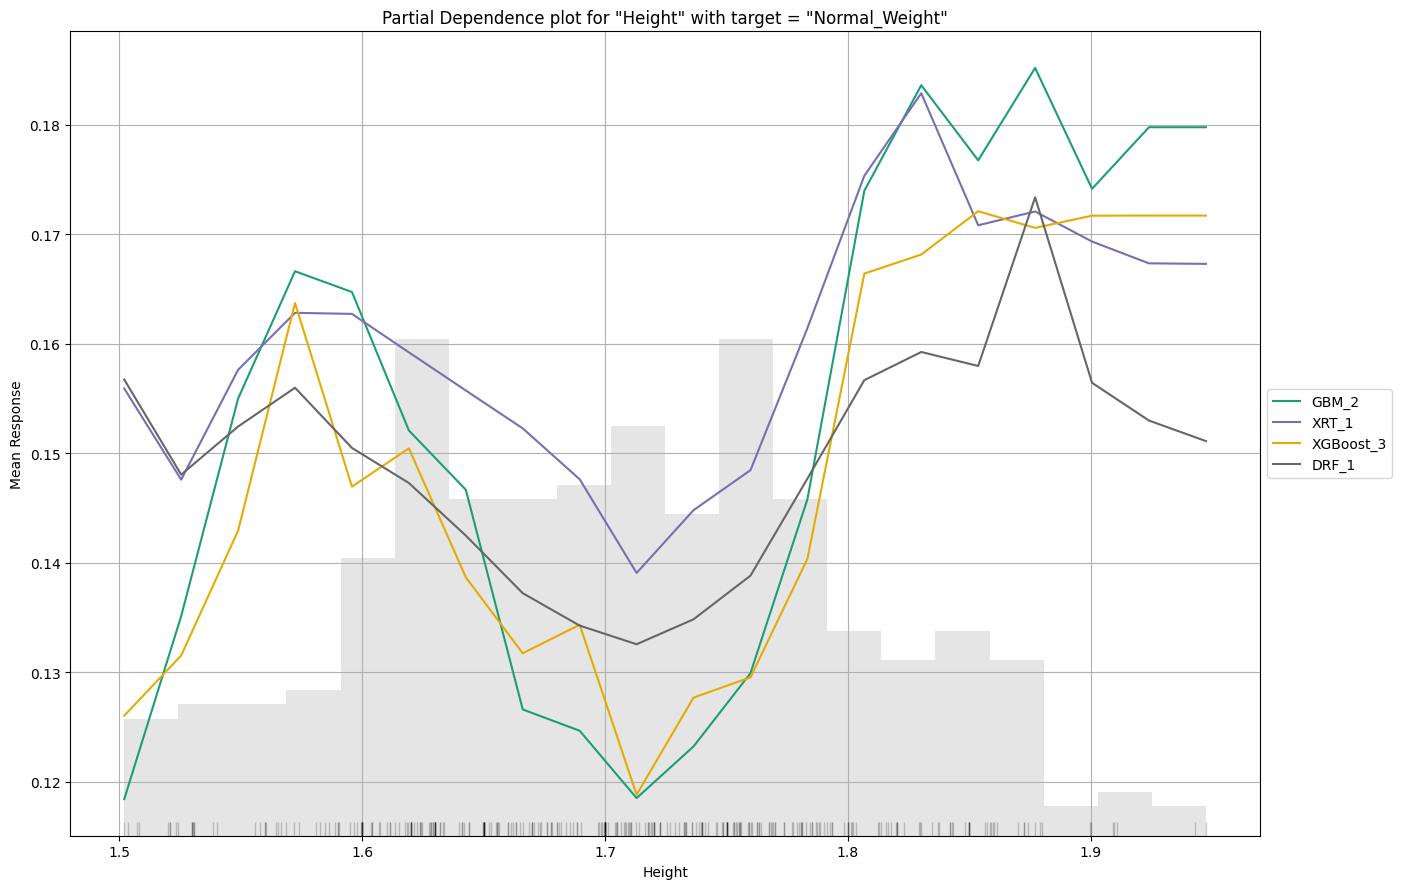

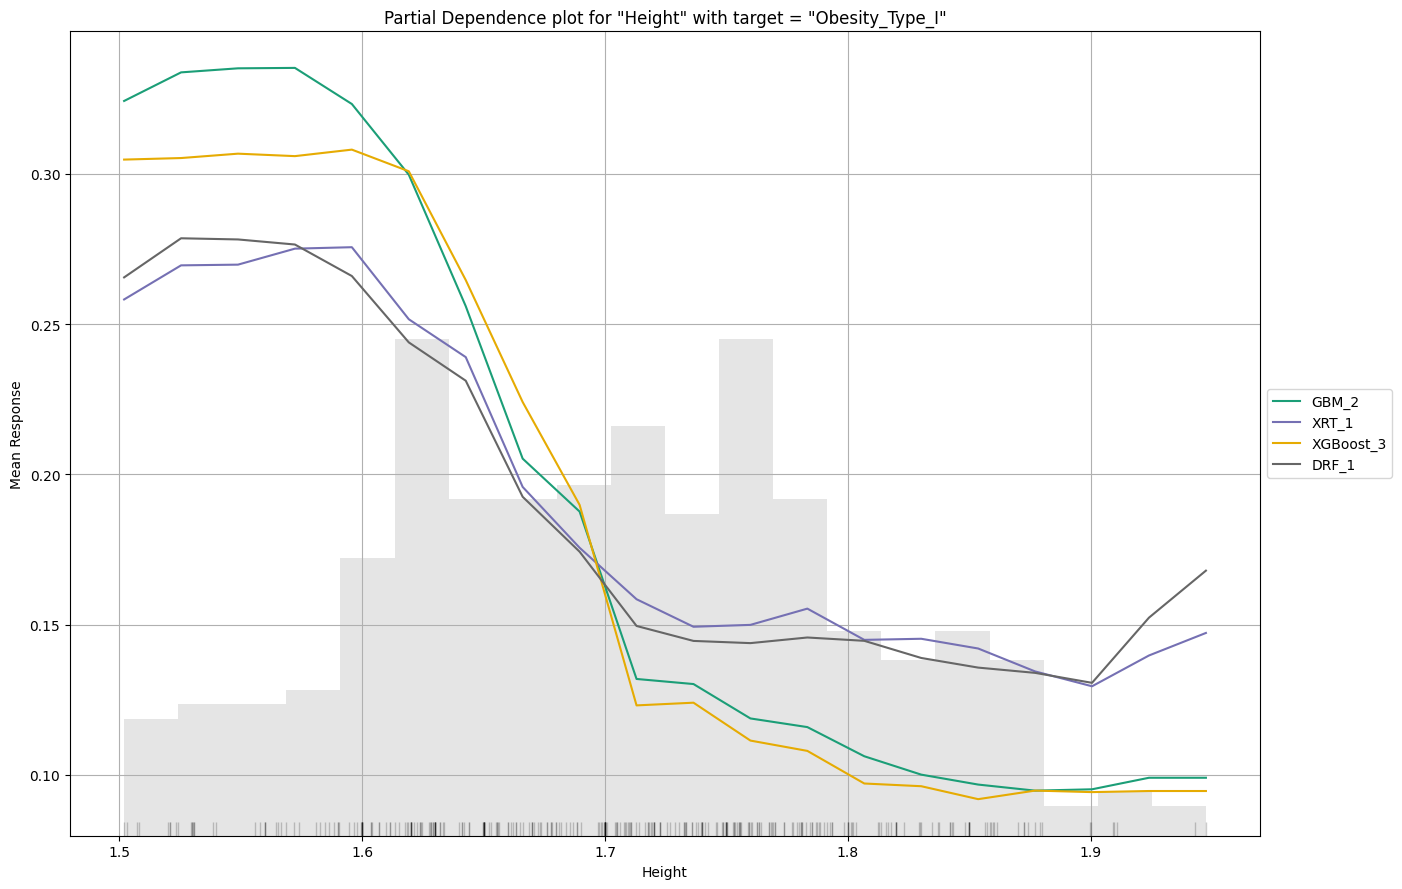

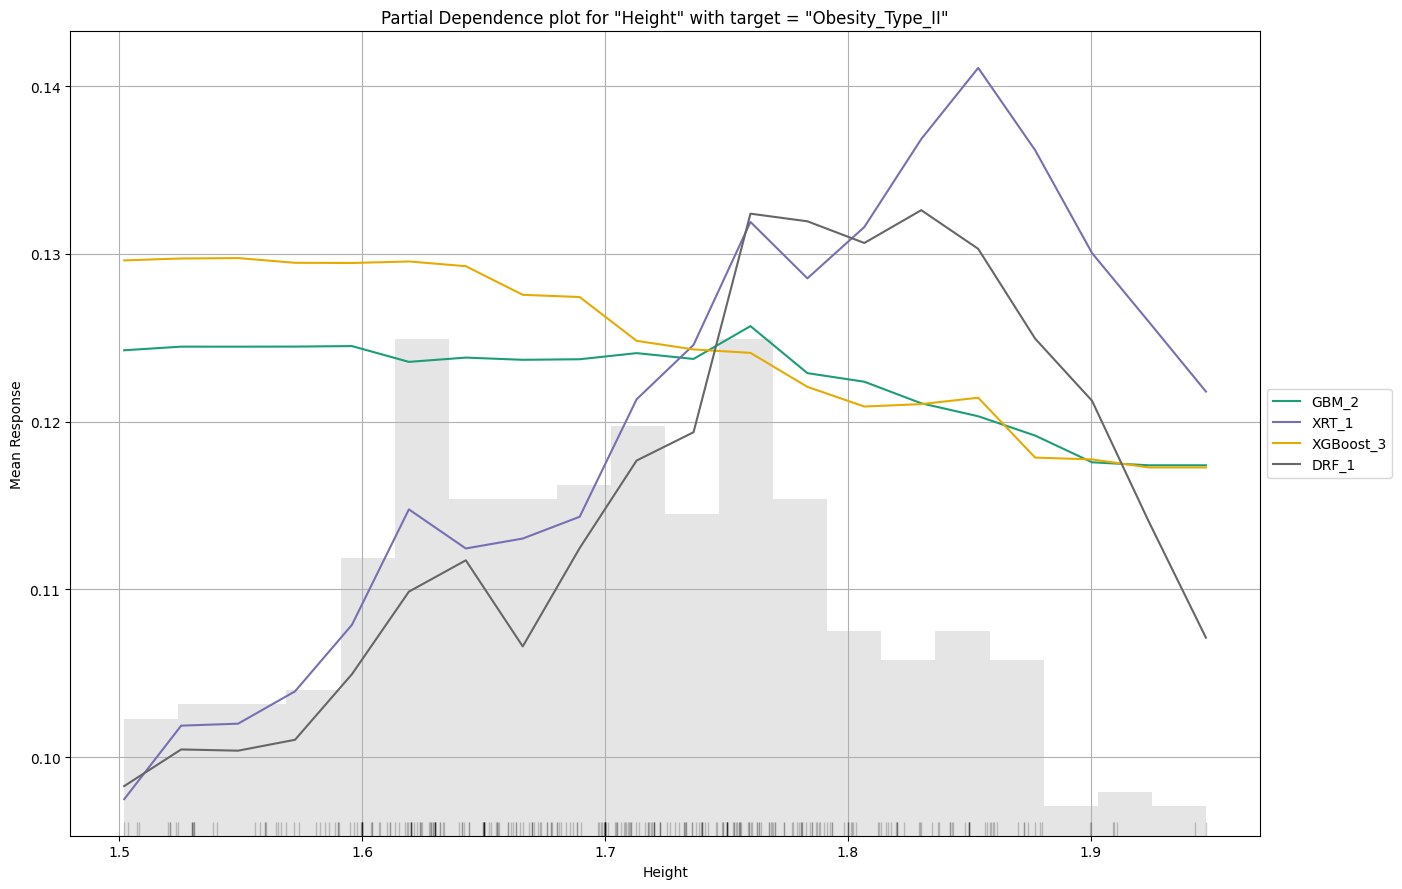

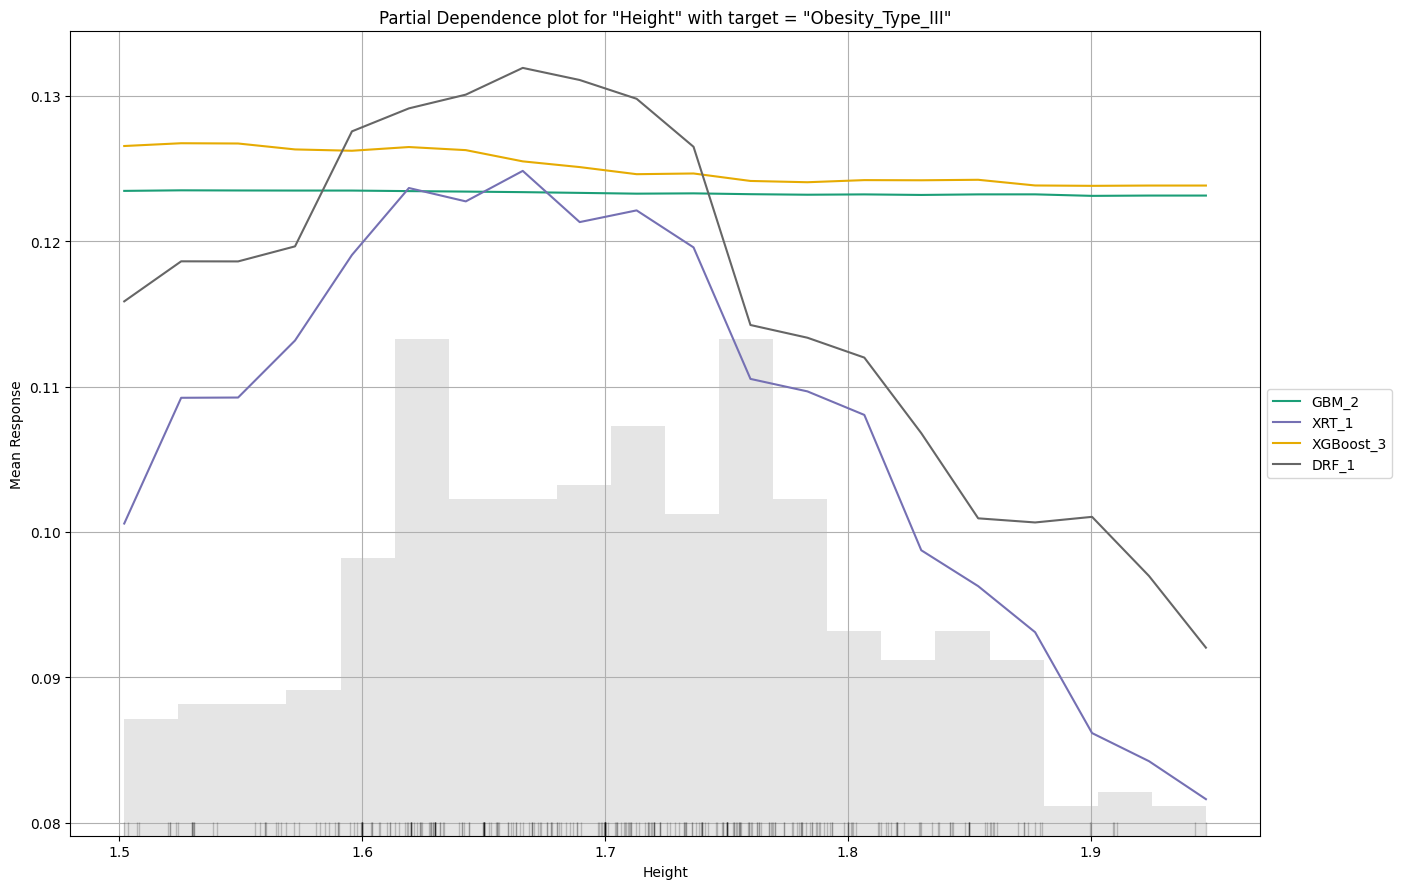

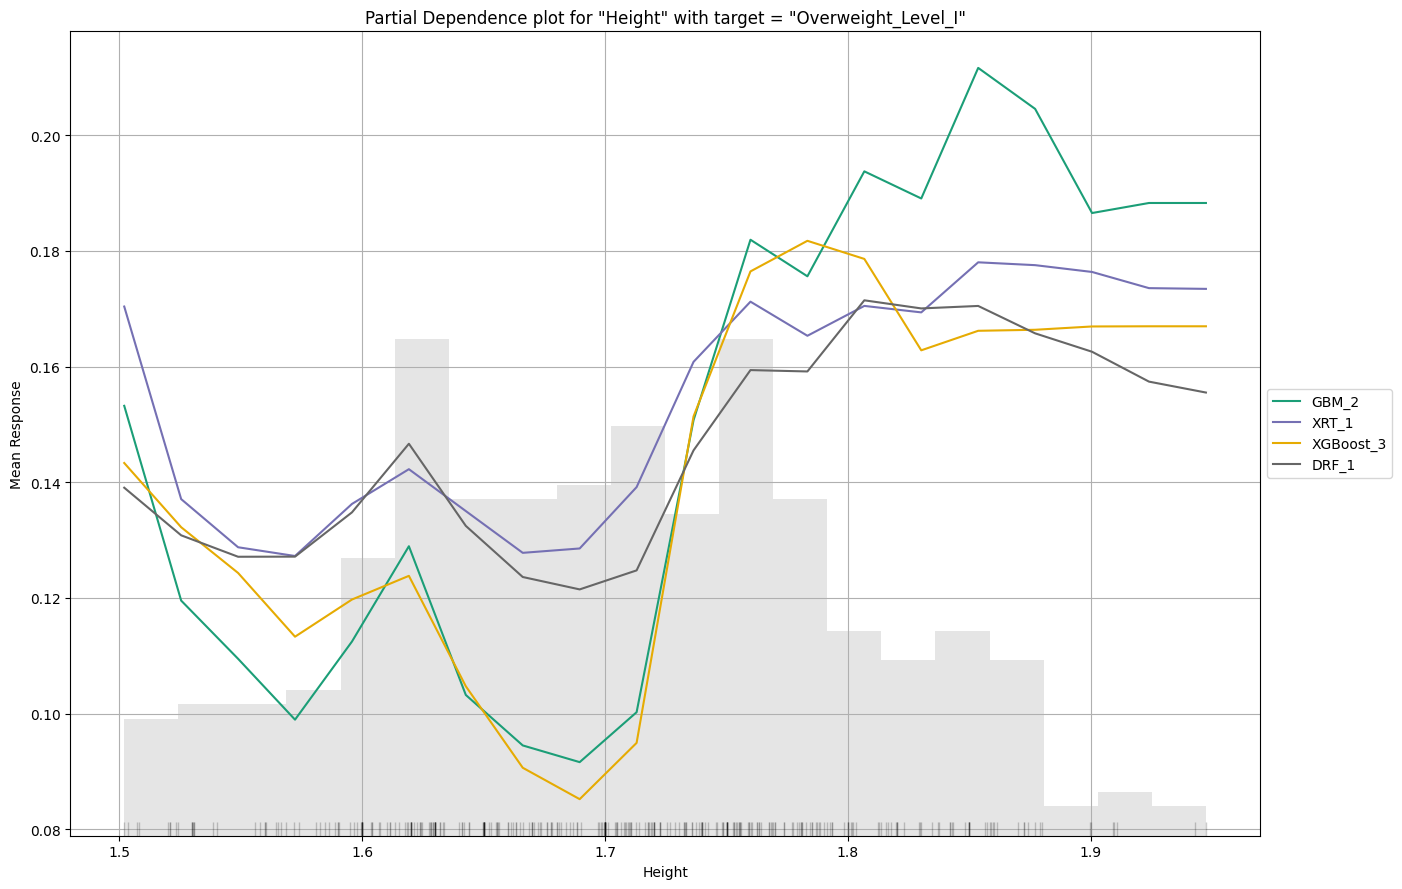

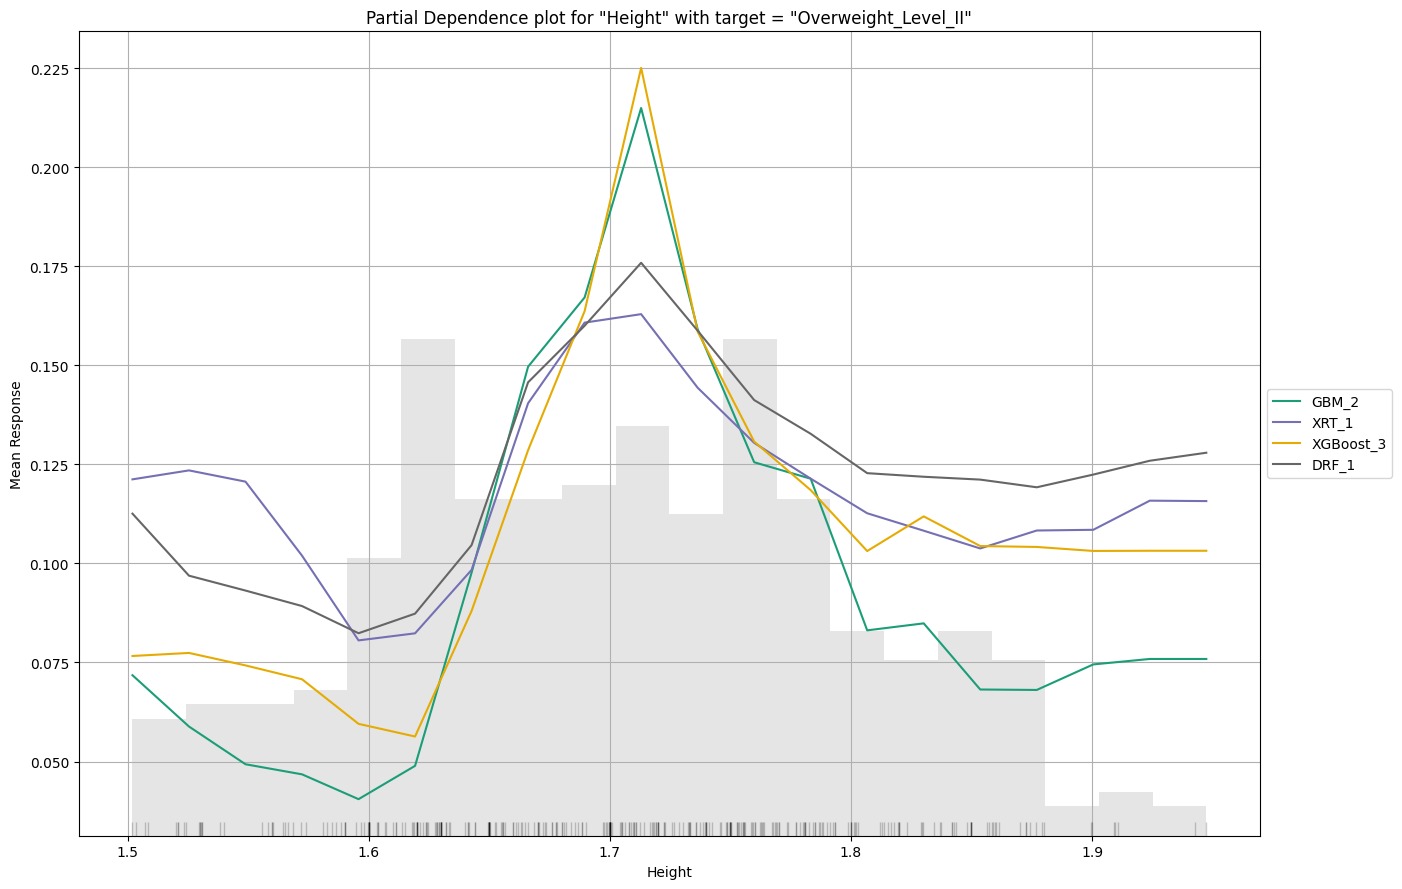

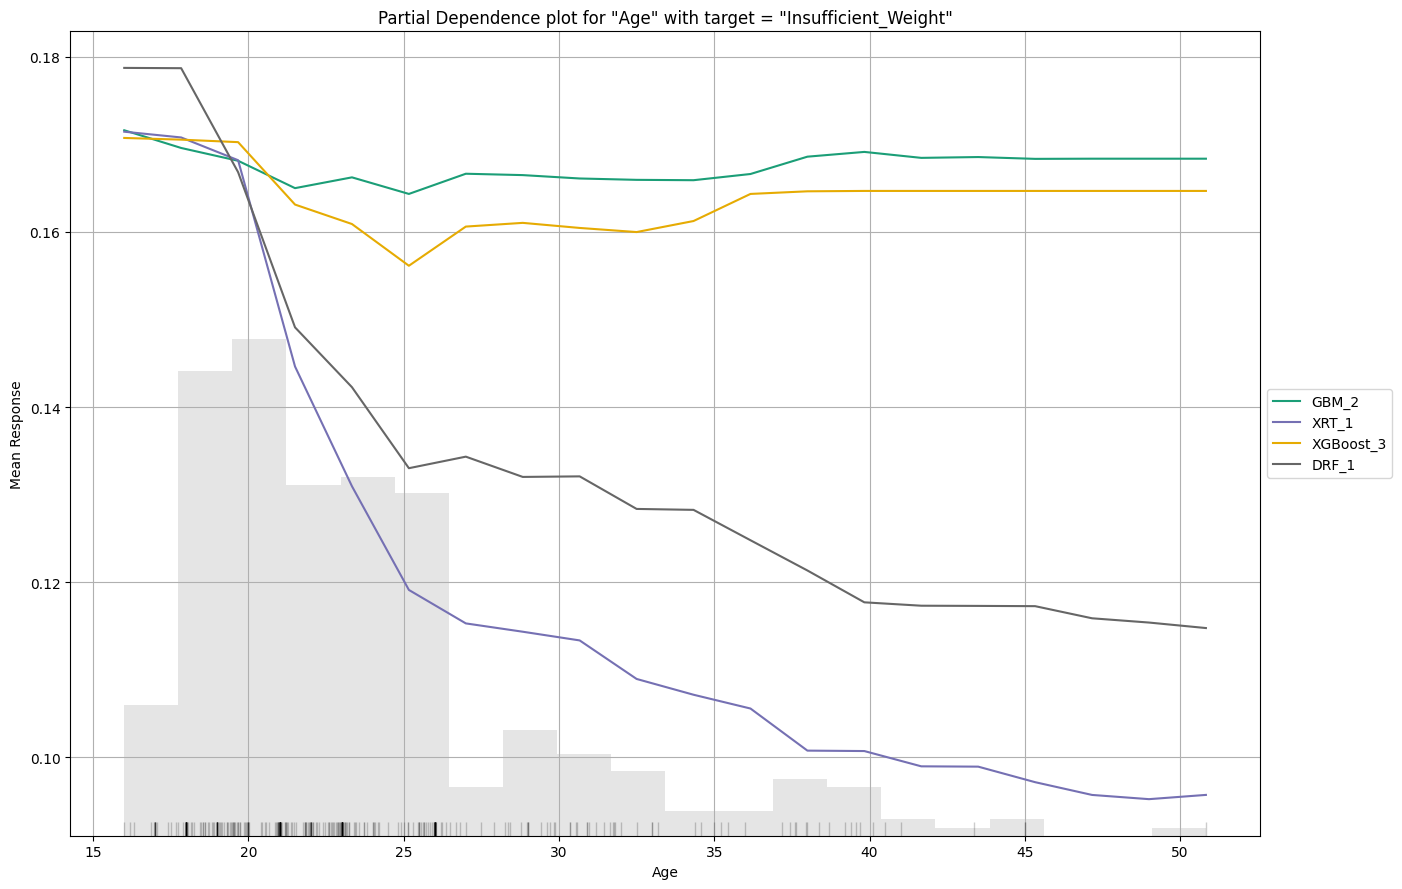

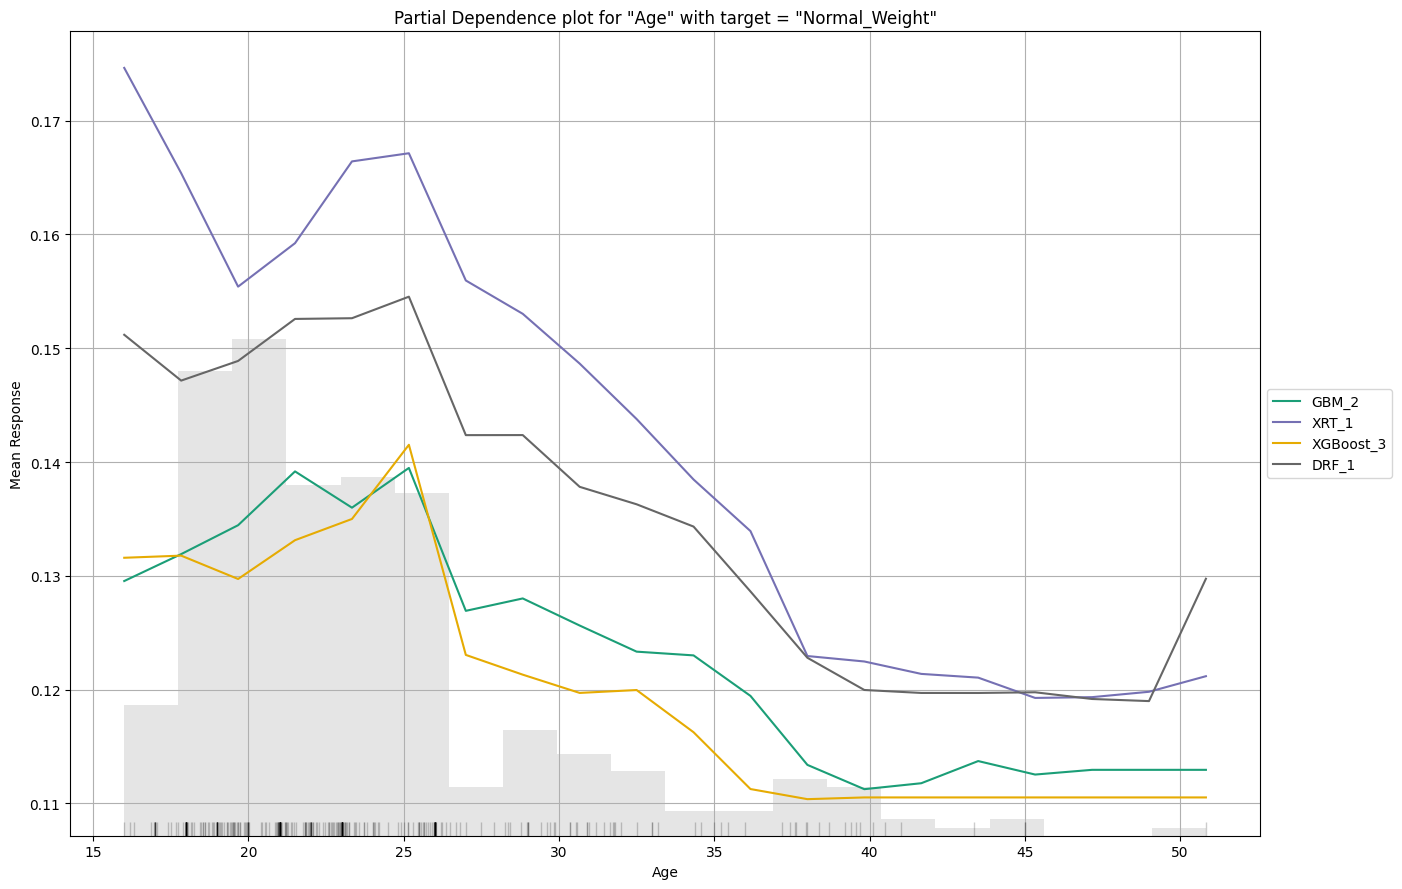

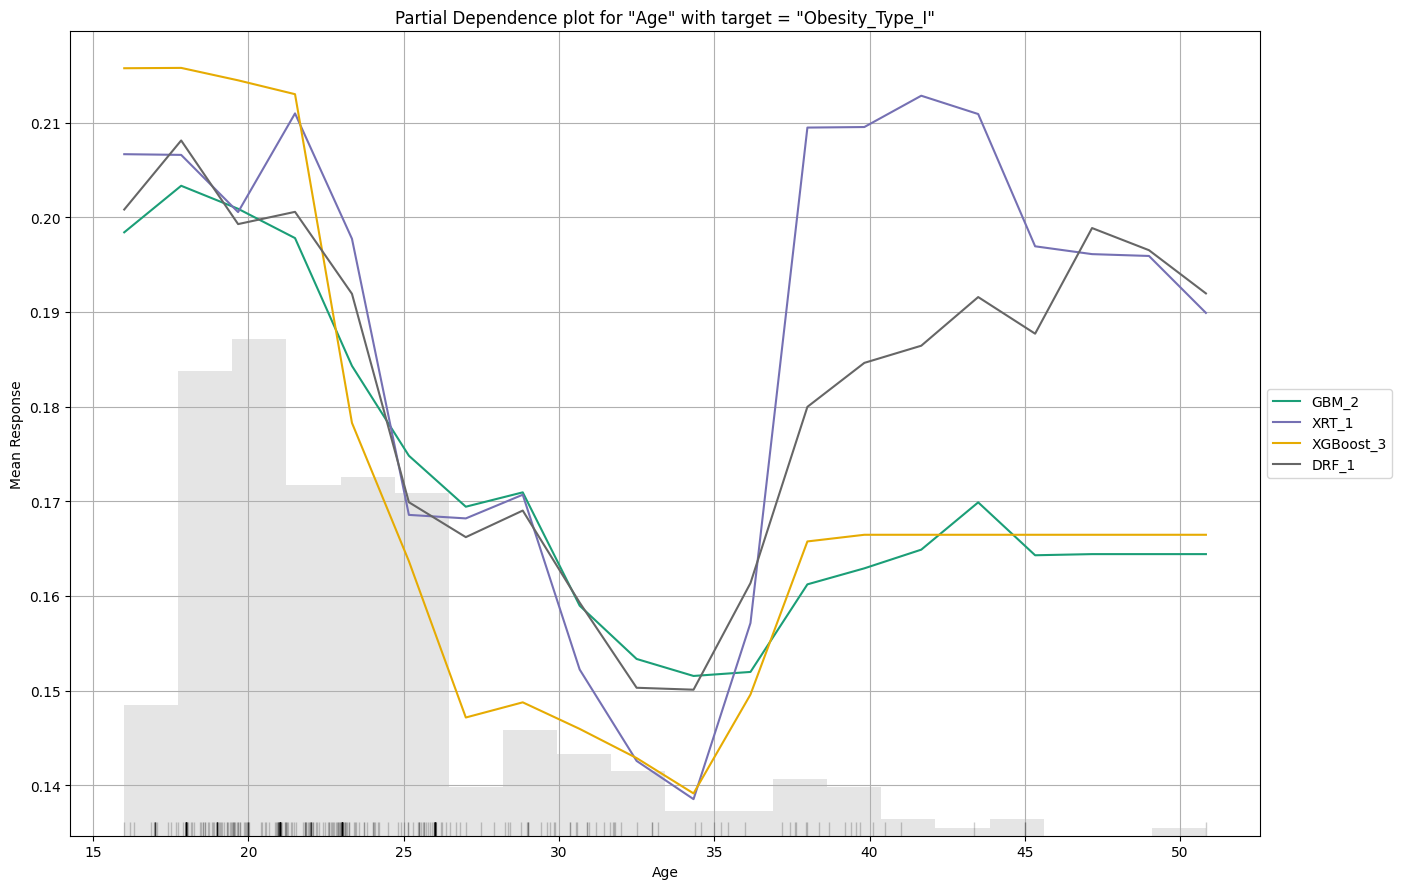

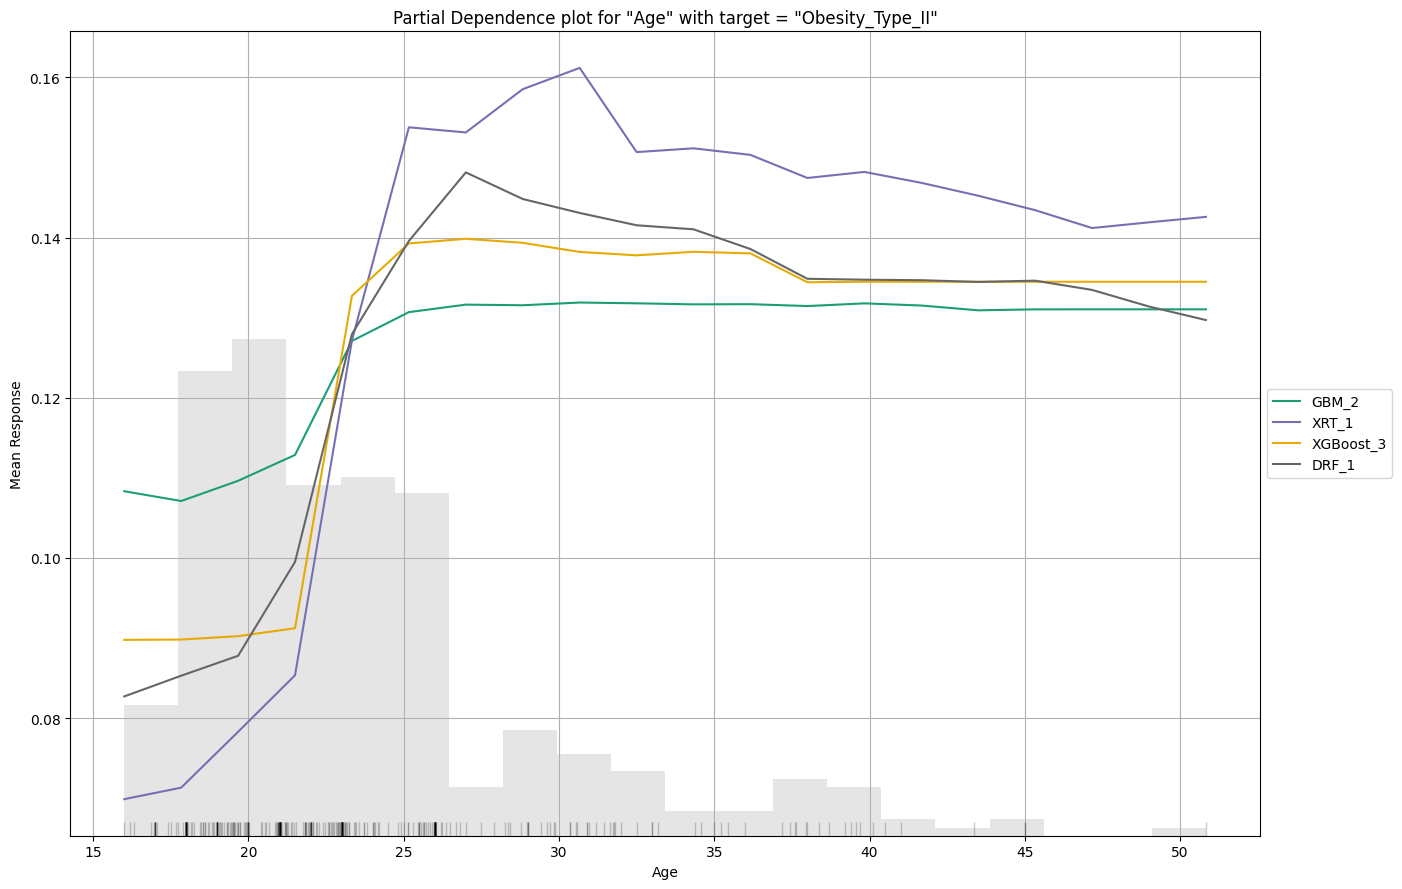

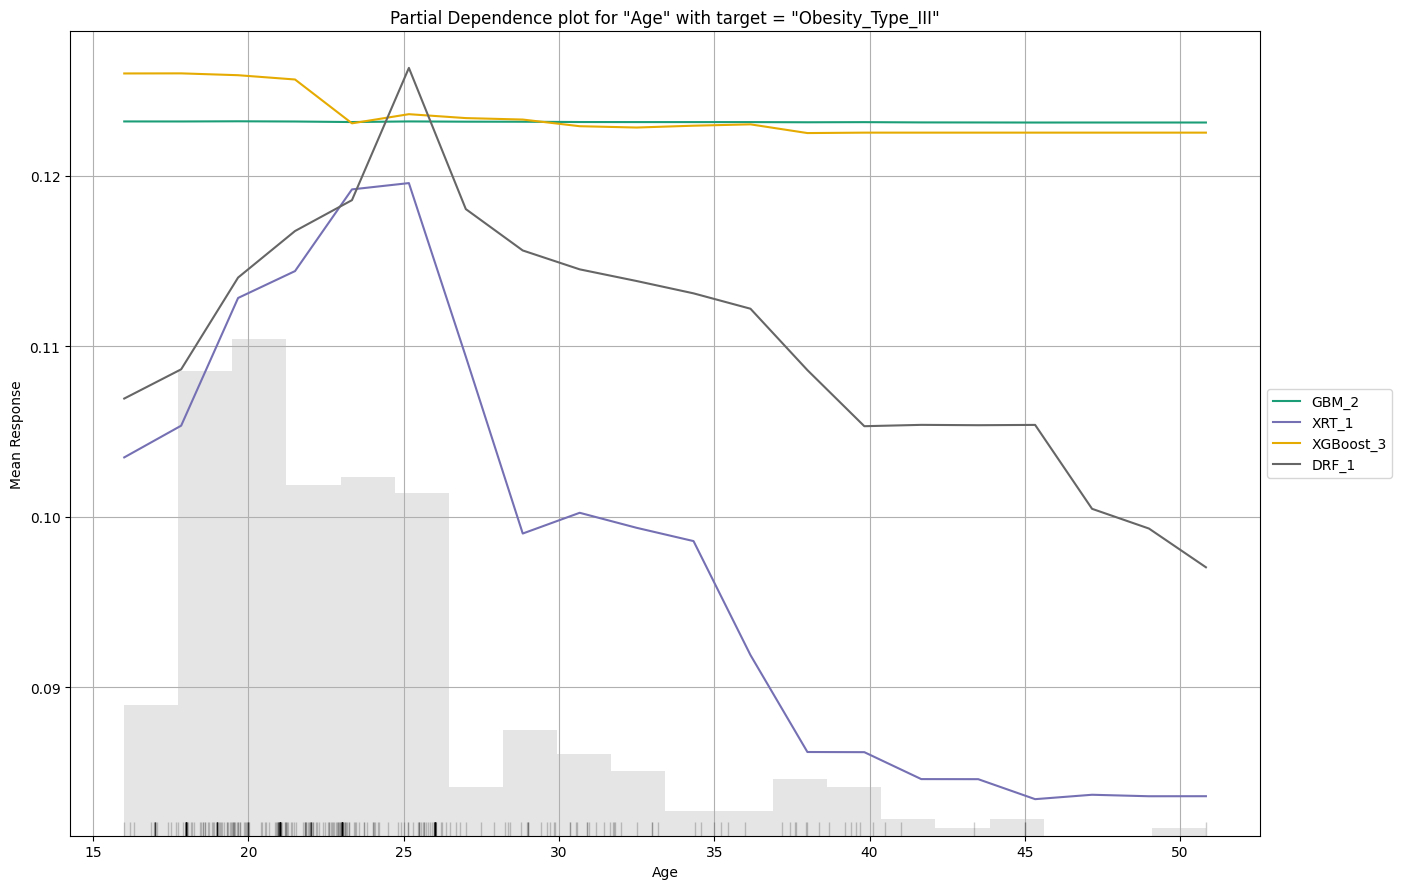

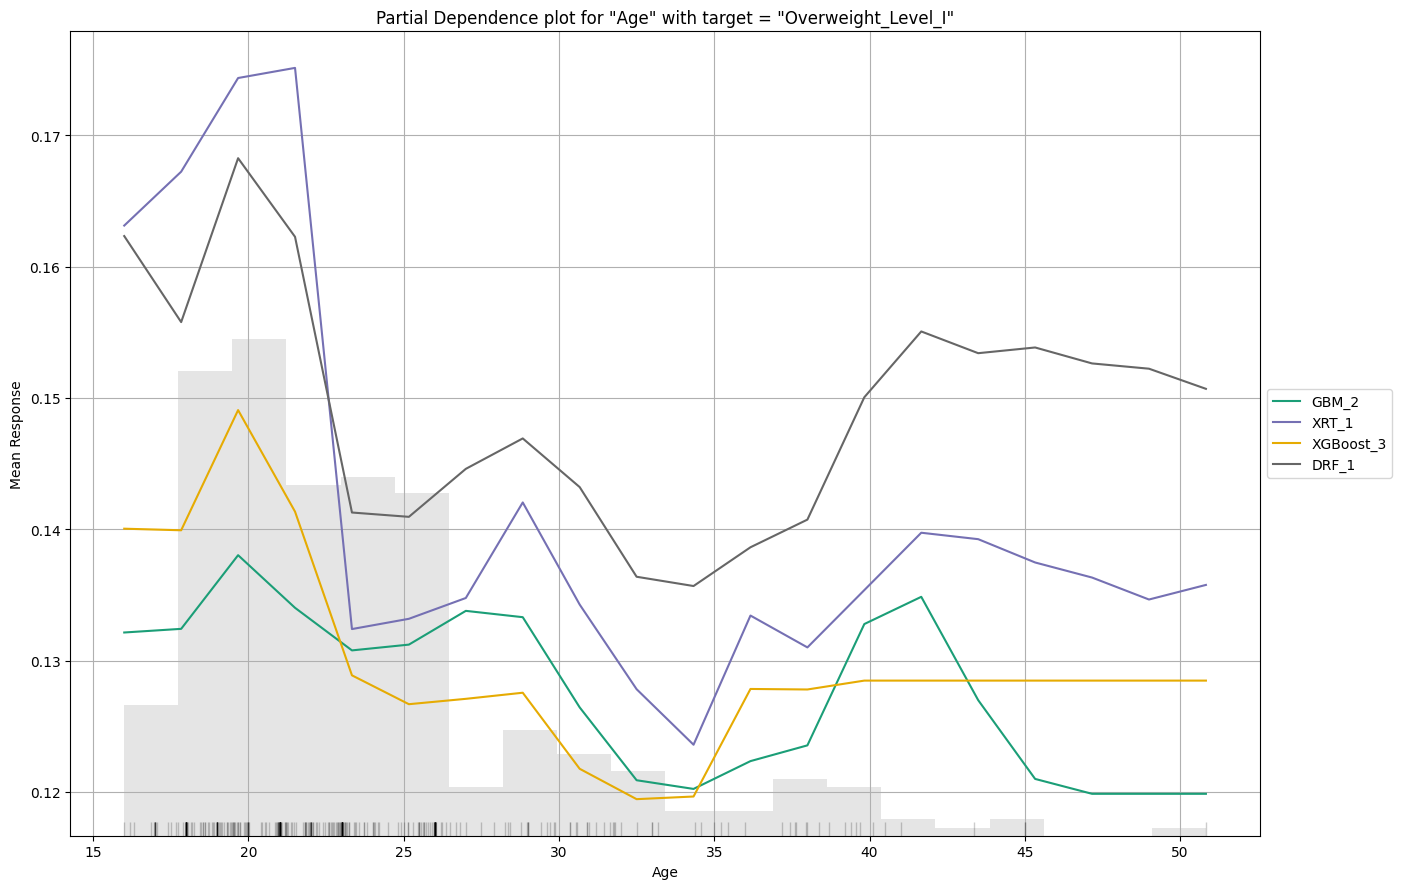

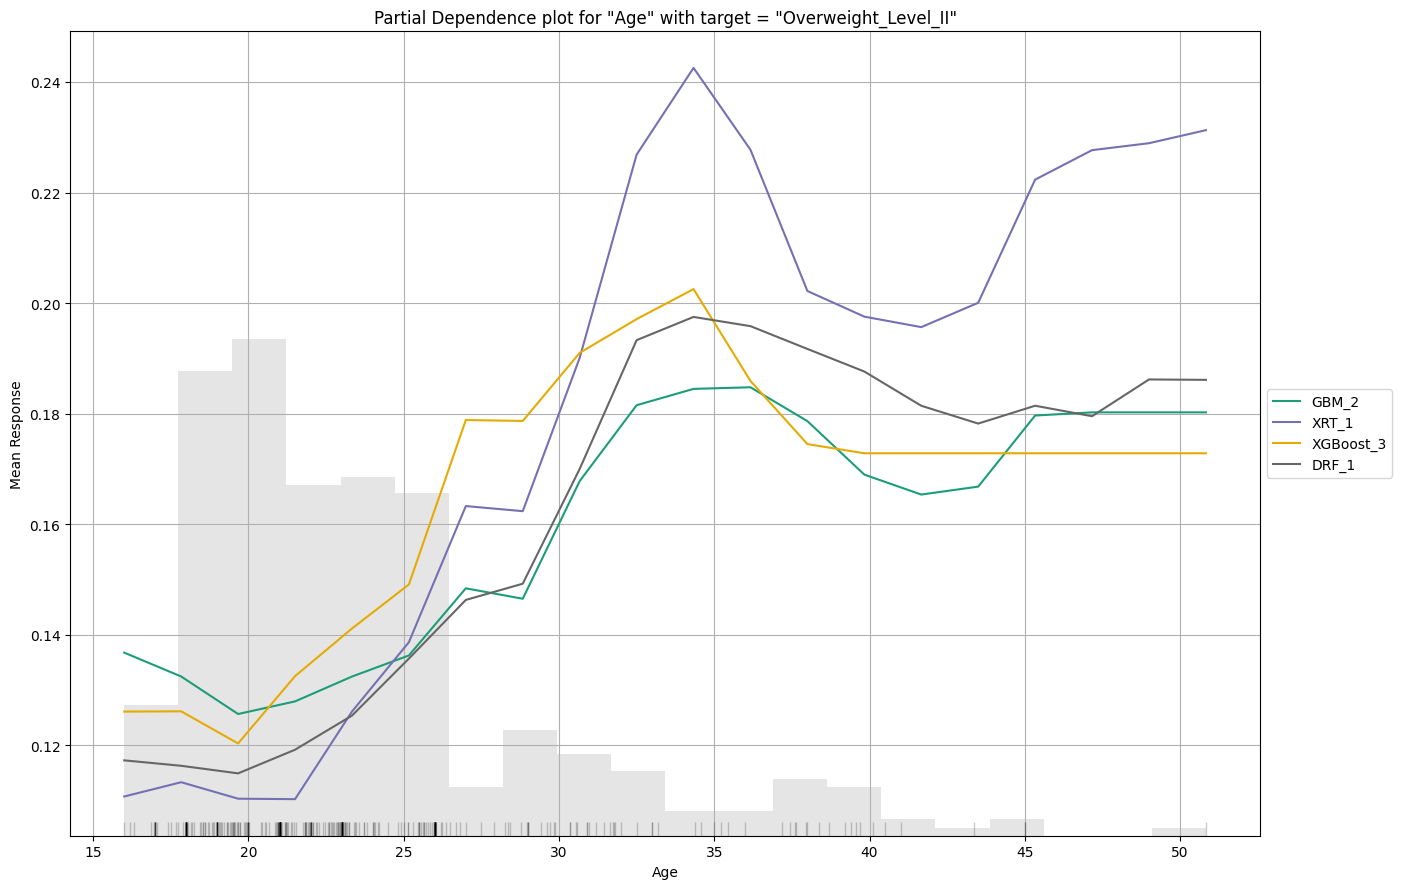

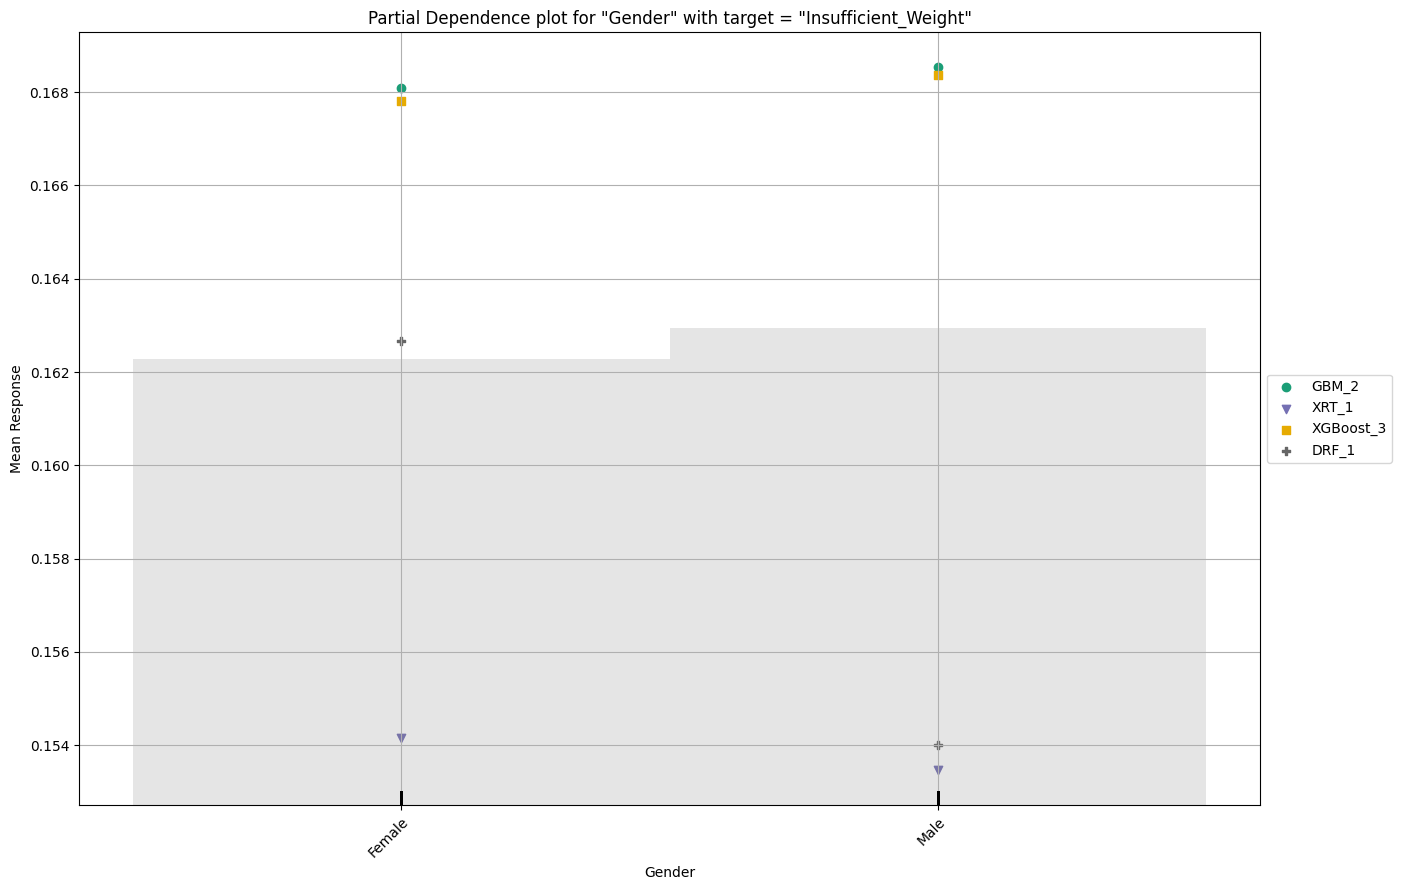

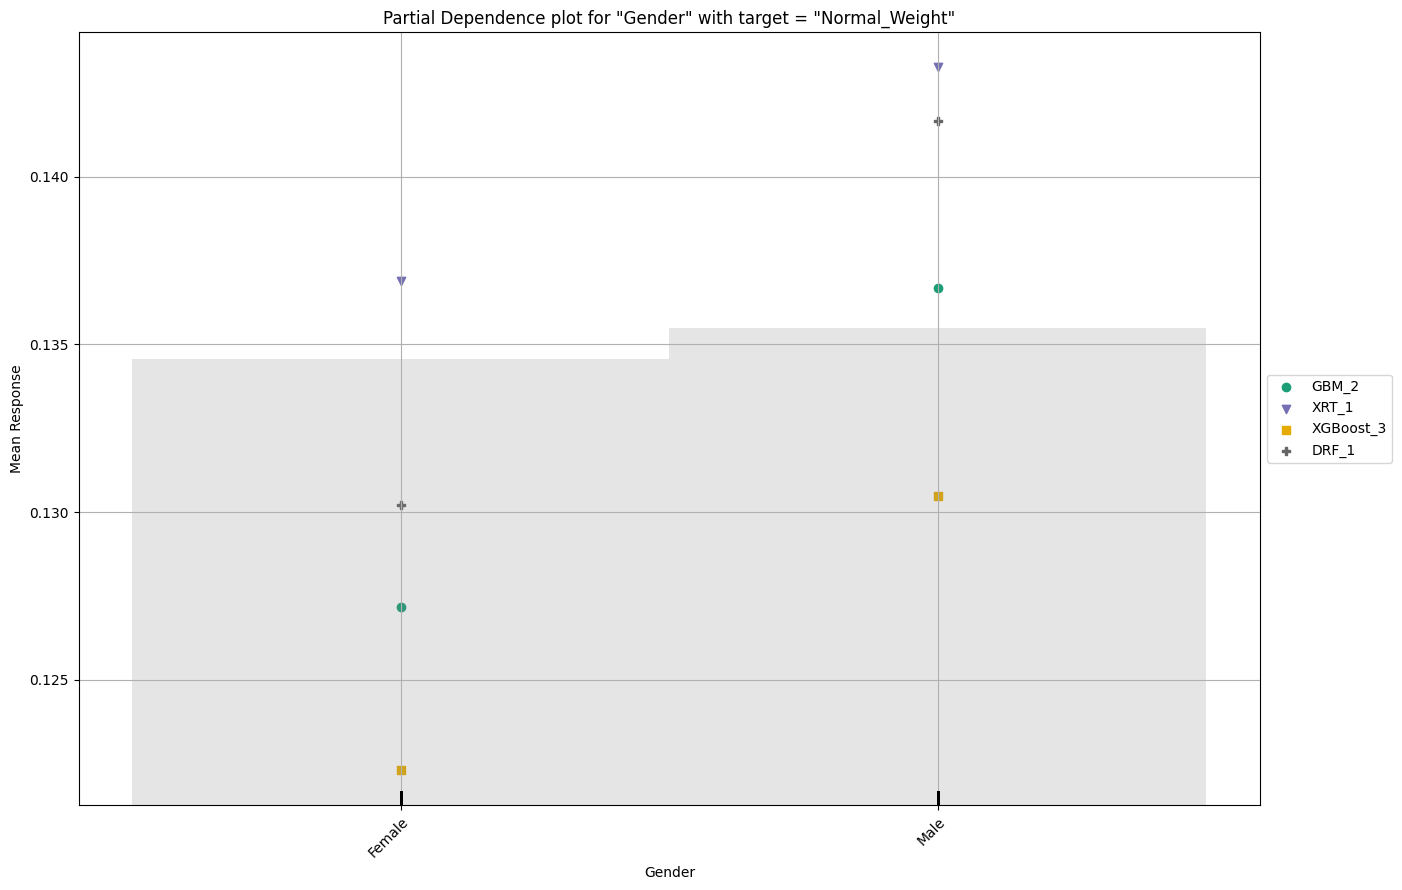

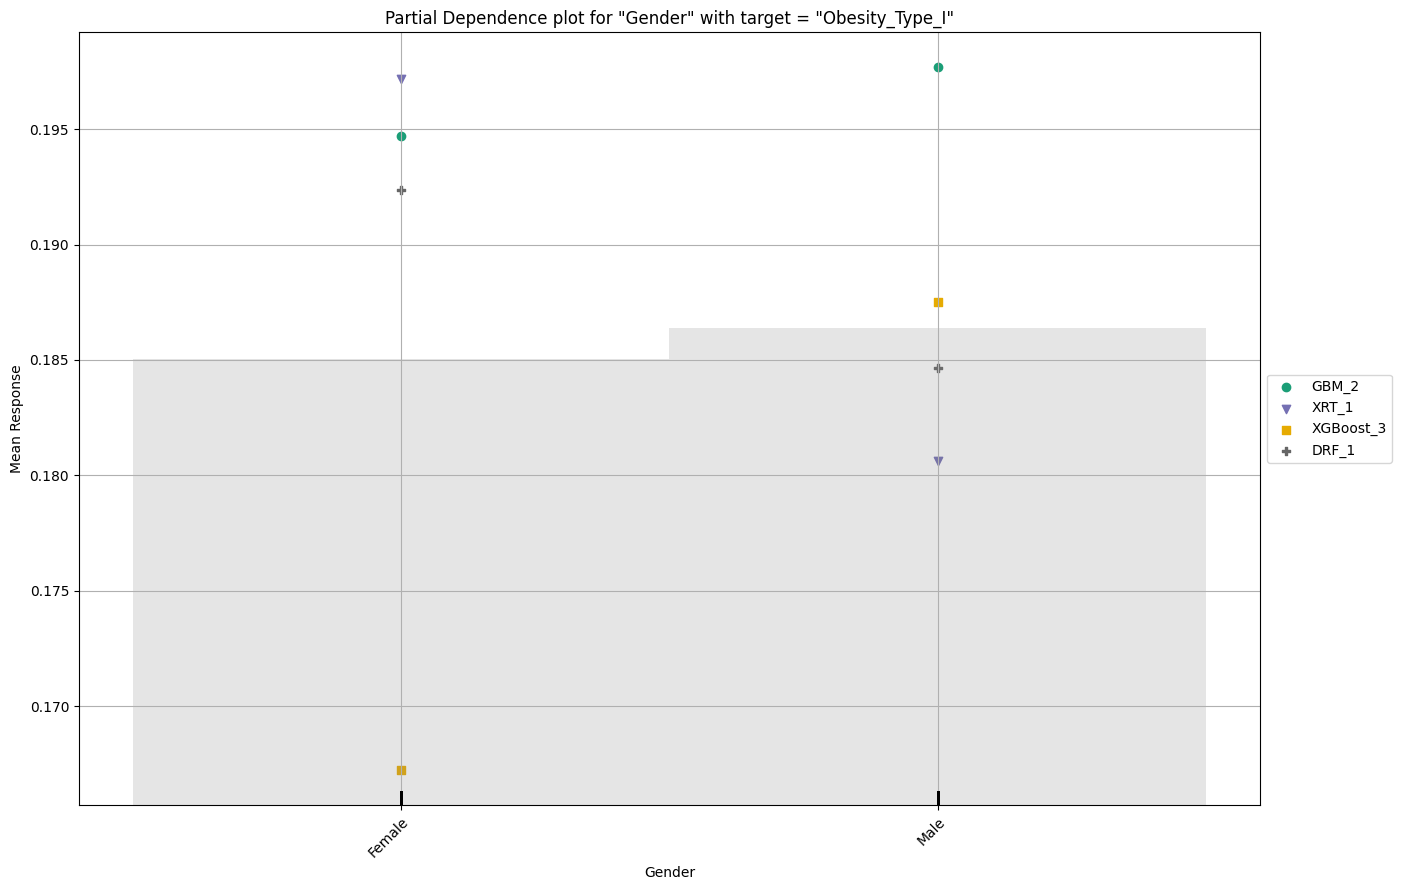

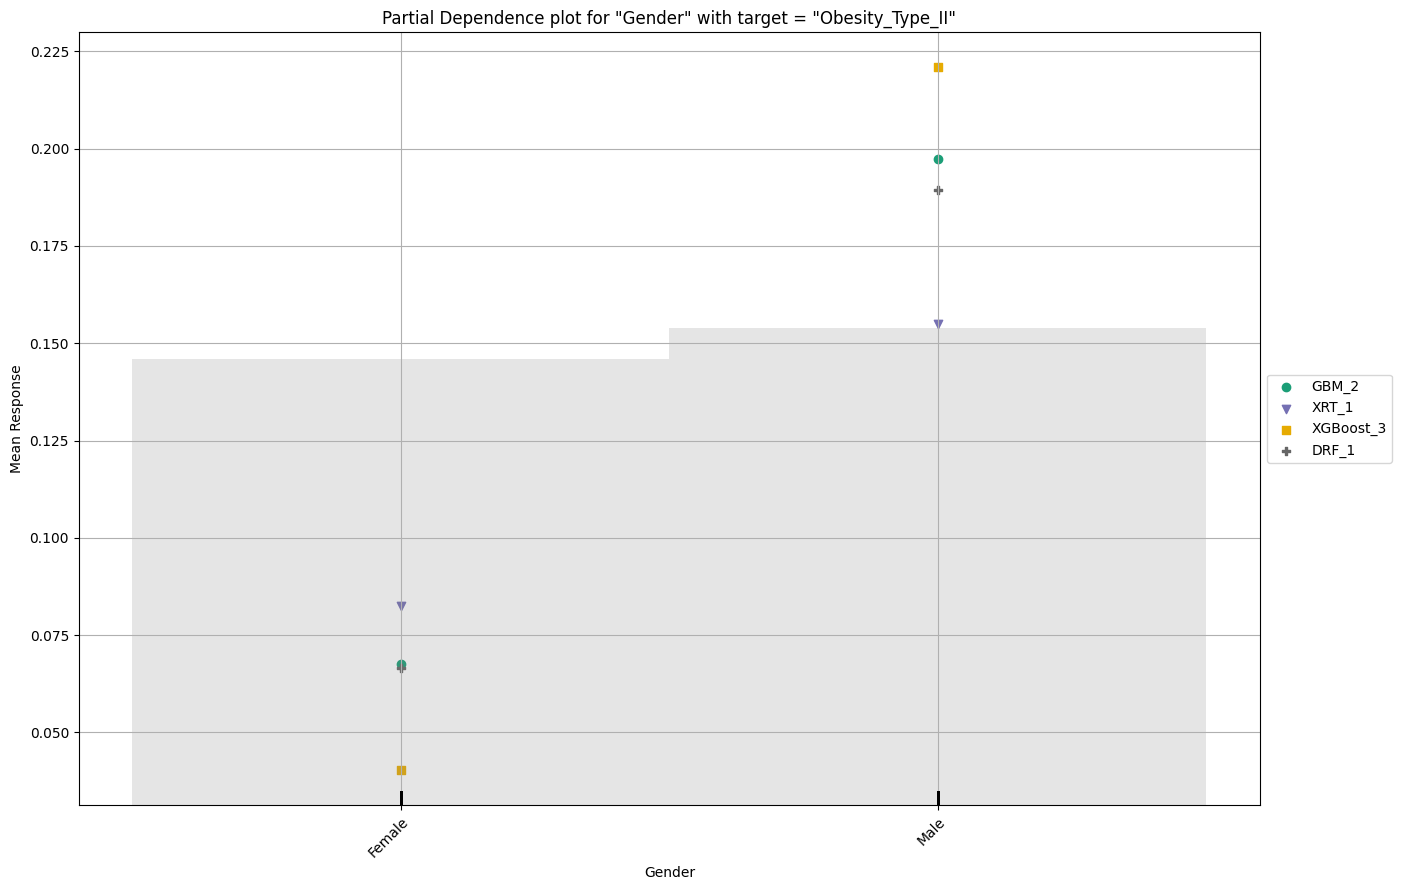

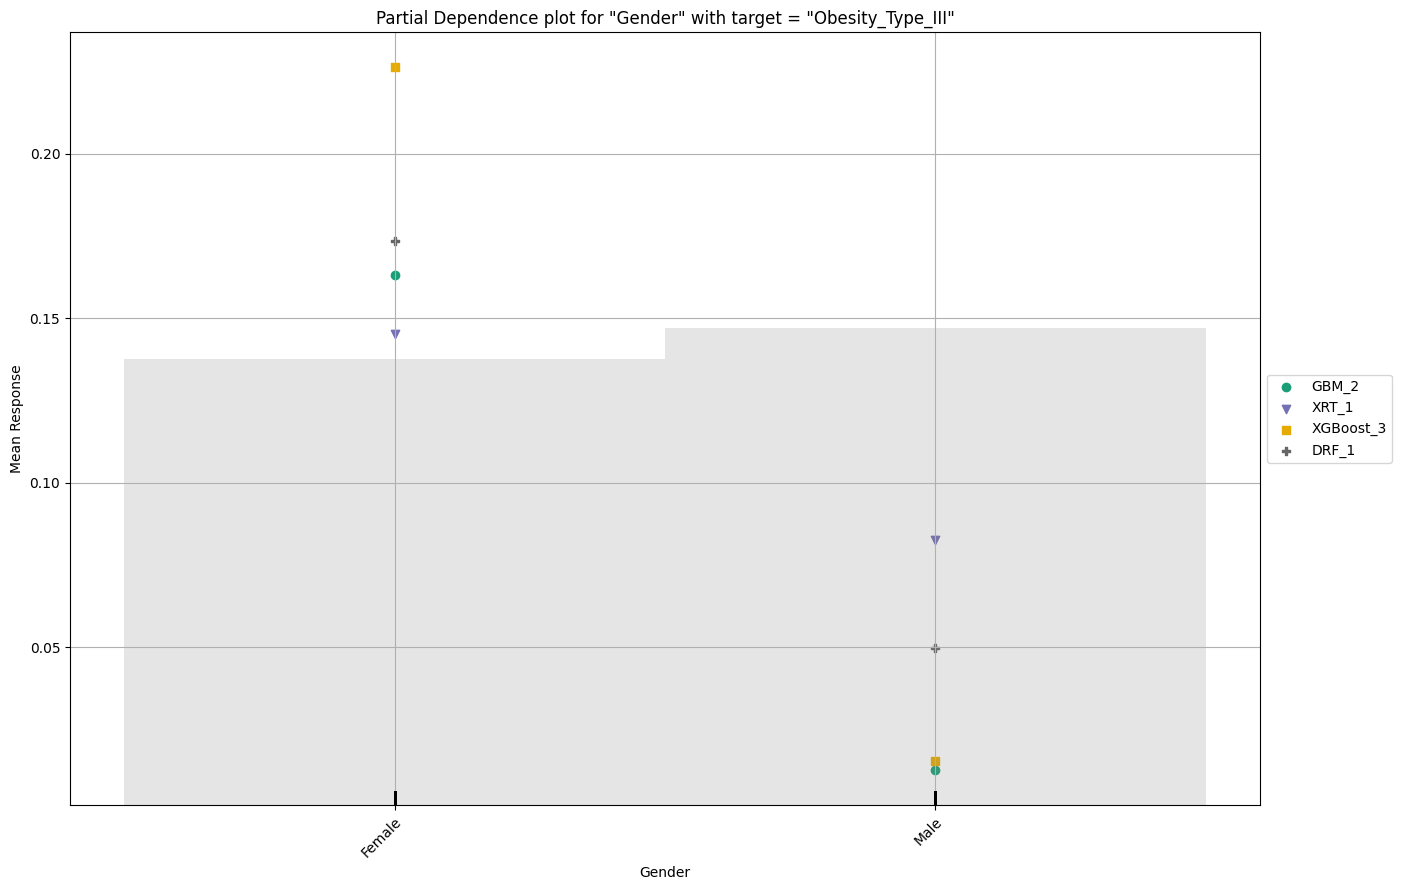

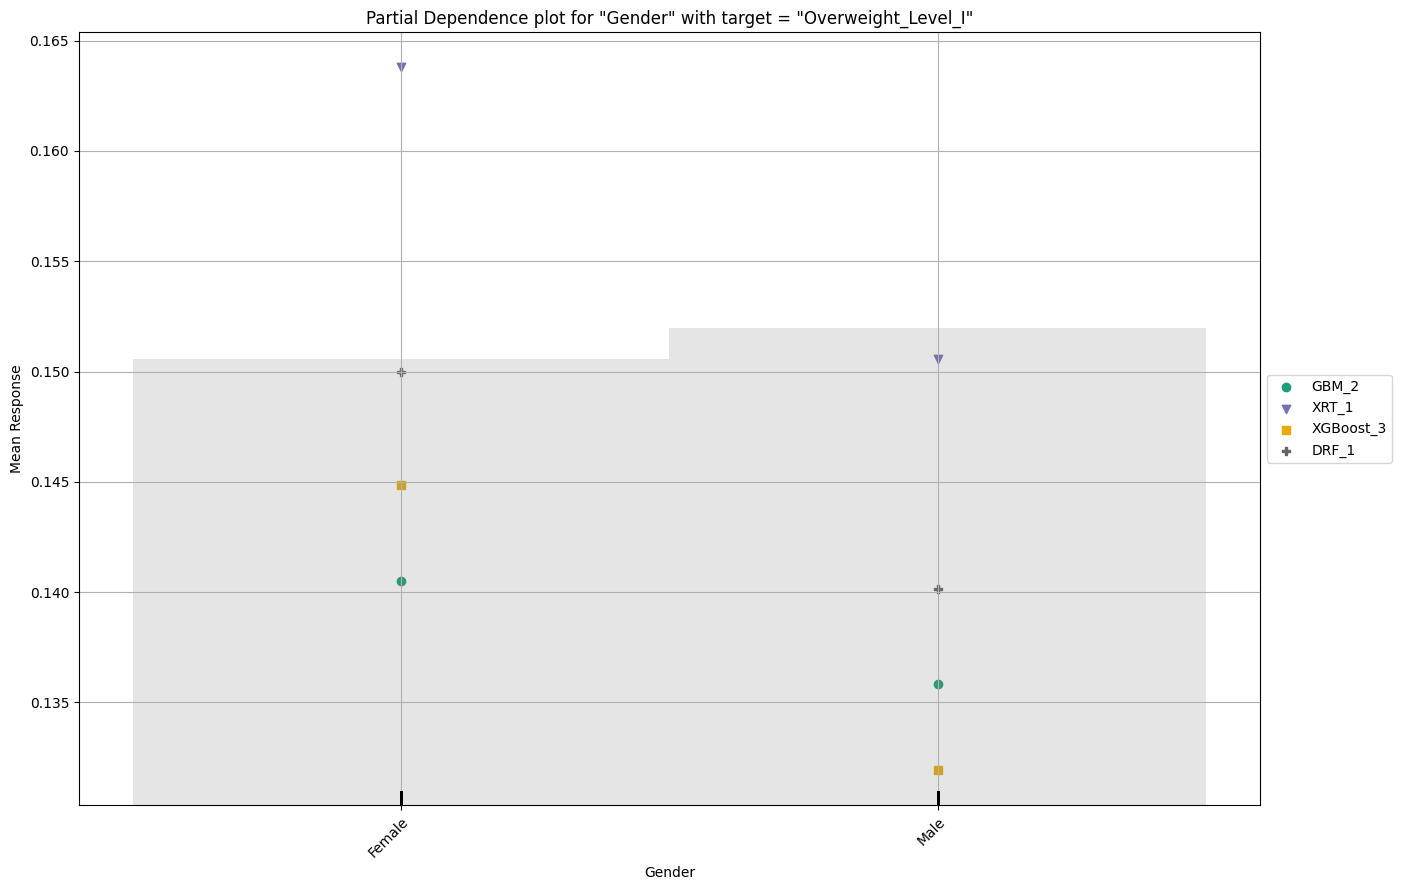

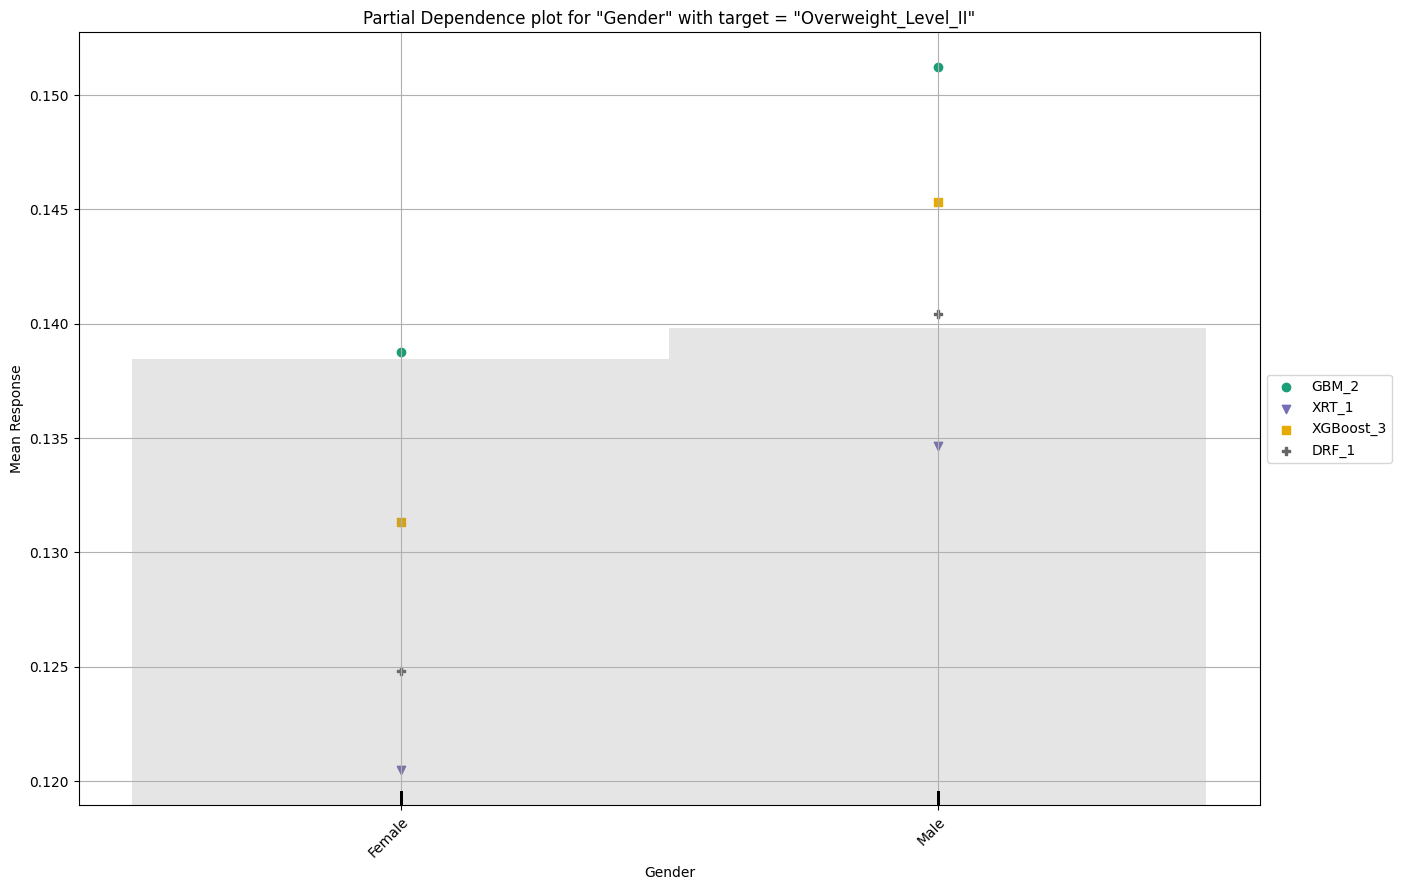

In [67]:
exa = aml.explain(df_test)